In [495]:

import pandas as pd
import json 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [496]:
transactions_data = pd.read_csv('/Users/thekiet/Downloads/Personal_project_data/transactions_data.csv')
cards_data = pd.read_csv('/Users/thekiet/Downloads/Personal_project_data/cards_data.csv')
users_data = pd.read_csv('/Users/thekiet/Downloads/Personal_project_data/users_data.csv')
print(cards_data.head(5))
print(users_data.head(5))
print(transactions_data.head(5))

     id  client_id  card_brand        card_type       card_number  expires  cvv has_chip  num_cards_issued credit_limit acct_open_date  year_pin_last_changed card_on_dark_web
0  4524        825        Visa            Debit  4344676511950444  12/2022  623      YES                 2       $24295        09/2002                   2008               No
1  2731        825        Visa            Debit  4956965974959986  12/2020  393      YES                 2       $21968        04/2014                   2014               No
2  3701        825        Visa            Debit  4582313478255491  02/2024  719      YES                 2       $46414        07/2003                   2004               No
3    42        825        Visa           Credit  4879494103069057  08/2024  693       NO                 1       $12400        01/2003                   2012               No
4  4659        825  Mastercard  Debit (Prepaid)  5722874738736011  03/2009   75      YES                 1          $28      

In [497]:
#Đọc file json 
with open('/Users/thekiet/Downloads/Personal_project_data/mcc_codes.json') as f:
    mcc_data = json.load(f)
with open('/Users/thekiet/Downloads/Personal_project_data/train_fraud_labels.json') as f:
    frauds_data = json.load(f)

In [498]:
#chuyển file json sang df
mcc_df = pd.DataFrame(list(mcc_data.items()), columns=['MCC_Code', 'Description'])
print(mcc_df.head())
frauds_df = pd.json_normalize(frauds_data).T.reset_index()
frauds_df.columns = ['index', 'target']
frauds_df['index'] = frauds_df['index'].str.replace('target.', '', regex=False)
print(frauds_df.head())

  MCC_Code                           Description
0     5812         Eating Places and Restaurants
1     5541                      Service Stations
2     7996  Amusement Parks, Carnivals, Circuses
3     5411          Grocery Stores, Supermarkets
4     4784                 Tolls and Bridge Fees
      index target
0  10649266     No
1  23410063     No
2   9316588     No
3  12478022     No
4   9558530     No


In [499]:
# Chuyển file json sang csv
mcc_df.to_csv('/Users/thekiet/Downloads/Personal_project_data/mcc_codes.csv', index=False)
mcc_codes = pd.read_csv('/Users/thekiet/Downloads/Personal_project_data/mcc_codes.csv')
print(mcc_codes.head())

frauds_df.to_csv('/Users/thekiet/Downloads/Personal_project_data/frauds_df.csv', index=False)
frauds_df = pd.read_csv('/Users/thekiet/Downloads/Personal_project_data/frauds_df.csv')
print(frauds_df.head())

   MCC_Code                           Description
0      5812         Eating Places and Restaurants
1      5541                      Service Stations
2      7996  Amusement Parks, Carnivals, Circuses
3      5411          Grocery Stores, Supermarkets
4      4784                 Tolls and Bridge Fees
      index target
0  10649266     No
1  23410063     No
2   9316588     No
3  12478022     No
4   9558530     No


In [500]:
#Xoá các cột không dùng đến
transactions_data = transactions_data.drop(columns=[
    'merchant_city',
    'merchant_state',
    'zip',
    'use_chip',
    'errors'])
users_data = users_data.drop(columns=[
    'retirement_age',
    'birth_year',
    'birth_month',
    'per_capita_income',
    'address',
    'latitude',
    'longitude',
    'num_credit_cards'])
cards_data = cards_data.drop(columns=[
    'cvv',
    'expires',
    'card_number',
    'card_brand',
    'year_pin_last_changed',
    'card_on_dark_web',
    'num_cards_issued',
    'acct_open_date'])

#Check lại các dataframe
print(transactions_data.head(5))
print(users_data.head(5))
print(cards_data.head(5))

        id                 date  client_id  card_id   amount  merchant_id   mcc
0  7475327  2010-01-01 00:01:00       1556     2972  $-77.00        59935  5499
1  7475328  2010-01-01 00:02:00        561     4575   $14.57        67570  5311
2  7475329  2010-01-01 00:02:00       1129      102   $80.00        27092  4829
3  7475331  2010-01-01 00:05:00        430     2860  $200.00        27092  4829
4  7475332  2010-01-01 00:06:00        848     3915   $46.41        13051  5813
     id  current_age  gender yearly_income total_debt  credit_score
0   825           53  Female        $59696    $127613           787
1  1746           53  Female        $77254    $191349           701
2  1718           81  Female        $33483       $196           698
3   708           63  Female       $249925    $202328           722
4  1164           43    Male       $109687    $183855           675
     id  client_id        card_type has_chip credit_limit
0  4524        825            Debit      YES       $24

In [532]:
#Kiểm tra NA 
print(transactions_data.isna().sum())
print(users_data.isna().sum())
print(cards_data.isna().sum())
print(mcc_codes.isna().sum())
print(frauds_df.isna().sum())

#Kiểm tra duplicate
print(transactions_data.duplicated().sum())
print(users_data.duplicated().sum())
print(cards_data.duplicated().sum())
print(mcc_codes.duplicated().sum())
print(frauds_df.duplicated().sum())


id             0
date           0
client_id      0
card_id        0
amount         0
merchant_id    0
mcc            0
dtype: int64
id               0
current_age      0
gender           0
yearly_income    0
total_debt       0
credit_score     0
dtype: int64
id              0
client_id       0
card_type       0
has_chip        0
credit_limit    0
dtype: int64
MCC_Code       0
Description    0
dtype: int64
index     0
target    0
dtype: int64
0
0
0
0
0


In [502]:
# Chuyển đổi kiểu dữ liệu
frauds_df['index'] = frauds_df['index'].astype(str)
transactions_data['id'] = transactions_data['id'].astype(str)

# Tìm các giao dịch có gian lận để loại bỏ trước khi sử dụng data
non_no_frauds = frauds_df[frauds_df['target'] != 'No']

# Lọc transactions lừa đảo
if len(non_no_frauds) > 0:
    clean_transactions = transactions_data[~transactions_data['id'].isin(non_no_frauds['index'])]
    print(f"Đã loại bỏ {len(transactions_data) - len(clean_transactions)} giao dịch lừa đảo")
else:
    clean_transactions = transactions_data.copy()
    print("Không có giao dịch lừa đảo")

Đã loại bỏ 13332 giao dịch lừa đảo


In [503]:
# Chuẩn hoá kiểu dữ liệu cho ngày tháng, giá trị giao dịch, thu nhập năm, tổng nợ, hạn mức tín dụng
clean_transactions['date'] = pd.to_datetime(clean_transactions['date'])
      # convert to datetime
clean_transactions['amount'] = (
    clean_transactions['amount']
    .str.replace('$', '', regex=False)  # Xóa ký hiệu $
    .str.replace(',', '', regex=False)   # Xóa dấu phân cách nghìn (nếu có)
    .apply(pd.to_numeric)
)

users_data['yearly_income'] = (
    users_data['yearly_income']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)
    .str.strip() 
    .apply(pd.to_numeric)
)

users_data['total_debt'] = (
    users_data['total_debt']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)
    .str.strip() 
    .apply(pd.to_numeric)
)

cards_data['credit_limit'] = (
    cards_data['credit_limit']
    .astype(str)
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .apply(pd.to_numeric)
)

/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_55542/4245443956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_transactions['date'] = pd.to_datetime(clean_transactions['date'])
/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_55542/4245443956.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_transactions['amount'] = (


In [504]:
#Kiểm tra tổng số mặt hàng đã được giao dịch 
unique_descriptions = mcc_df['Description'].unique()
print(unique_descriptions)
print(f"Tổng số giá trị unique: {len(unique_descriptions)}")

['Eating Places and Restaurants' 'Service Stations'
 'Amusement Parks, Carnivals, Circuses' 'Grocery Stores, Supermarkets'
 'Tolls and Bridge Fees' 'Utilities - Electric, Gas, Water, Sanitary'
 'Book Stores' 'Fast Food Restaurants' 'Money Transfer'
 'Department Stores' 'Lumber and Building Materials' 'Discount Stores'
 'Computer Network Services' 'Miscellaneous Food Stores'
 'Taxicabs and Limousines' 'Wholesale Clubs'
 'Miscellaneous Home Furnishing Stores' 'Motion Picture Theaters'
 'Drinking Places (Alcoholic Beverages)' 'Telecommunication Services'
 'Shoe Stores' 'Cosmetic Stores' 'Medical Services'
 'Automotive Service Shops' 'Drug Stores and Pharmacies'
 'Local and Suburban Commuter Transportation'
 'Digital Goods - Media, Books, Apps' 'Dentists and Orthodontists'
 'Package Stores, Beer, Wine, Liquor'
 'Sports Apparel, Riding Apparel Stores' 'Beauty and Barber Shops'
 'Miscellaneous Metalwork' 'Theatrical Producers' 'Passenger Railways'
 'Family Clothing Stores'
 'Cable, Satellite

In [505]:
# Tạo map gán tên ngành hàng vào mỗi giao dịch nhằm phân loại giao dịch theo ngành hàng
mcc_map = dict(zip(mcc_codes['MCC_Code'].astype(str), mcc_codes['Description'])) # tạo từ điển đối chiếu mã -> tên
clean_transactions['mcc'] = clean_transactions['mcc'].astype(str) #chuyển đổi mã mcc là text
clean_transactions['Description'] = clean_transactions['mcc'].map(mcc_map) 

# Tạo nhóm category lớn, loại outliner category 
def categorize_into_groups(description):
    if pd.isna(description):
        return 'Other'
    
    description_lower = description.lower()
    
    # 1. Ăn uống & Nhà hàng
    if any(keyword in description_lower for keyword in ['restaurant', 'eating', 'food', 'fast food', 'drinking', 'bar', 'cafe']):
        return 'Food & Dining'
    
    # 2. Mua sắm & Bán lẻ
    elif any(keyword in description_lower for keyword in ['store', 'shop', 'department', 'discount', 'wholesale', 'retail', 'clothing', 'shoe', 'cosmetic', 'furniture', 'electronics', 'hardware', 'sporting', 'appliance', 'gift', 'music', 'book', 'florist']):
        return 'Shopping & Retail'
    
    # 3. Dịch vụ cá nhân & Sức khỏe
    elif any(keyword in description_lower for keyword in ['medical', 'doctor', 'dentist', 'hospital', 'chiropractor', 'podiatrist', 'beauty', 'barber', 'laundry', 'cleaning', 'legal', 'insurance', 'accounting', 'tax']):
        return 'Personal Services & Healthcare'
    
    # 4. Du lịch & Giải trí
    elif any(keyword in description_lower for keyword in ['travel', 'hotel', 'motel', 'resort', 'lodging', 'airline', 'cruise', 'railroad', 'railway', 'bus', 'transportation', 'amusement', 'park', 'theater', 'sports', 'recreational', 'betting', 'casino']):
        return 'Travel & Entertainment'
    
    # 5. Xăng dầu & Di chuyển
    elif any(keyword in description_lower for keyword in ['service station', 'gas', 'fuel', 'toll', 'bridge', 'trucking', 'freight', 'towing', 'automotive', 'car wash']):
        return 'Fuel & Transportation'
    
    # 6. Tiện ích & Dịch vụ gia đình
    elif any(keyword in description_lower for keyword in ['utility', 'electric', 'gas', 'water', 'sanitary', 'telecommunication', 'cable', 'satellite', 'tv', 'heating', 'plumbing', 'air conditioning']):
        return 'Utilities & Home Services'
    
    # 7. Mặt hàng công nghệ
    elif any(keyword in description_lower for keyword in ['computer', 'network', 'digital', 'electronic', 'semiconductor', 'software', 'app', 'game']):
        return 'Technology & Digital Goods'
    
    # 8. Vật liệu & Xây dựng
    elif any(keyword in description_lower for keyword in ['lumber', 'building', 'material', 'metal', 'steel', 'iron', 'welding', 'fabrication', 'machinery', 'industrial', 'tool']):
        return 'Construction & Industrial'
    
    # 9. Dịch vụ tài chính
    elif any(keyword in description_lower for keyword in ['money transfer', 'bank', 'financial', 'payment']):
        return 'Financial Services'
    
    # 10. Khác
    else:
        return 'Other'

# Áp dụng phân loại mới cho các mặt hàng 
clean_transactions['category_group'] = clean_transactions['Description'].apply(categorize_into_groups)

print("Số lượng các mặt hàng theo phân loại mới:")
print(clean_transactions['category_group'].value_counts())



/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_55542/3803892929.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_transactions['mcc'] = clean_transactions['mcc'].astype(str) #chuyển đổi mã mcc là text
/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_55542/3803892929.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_transactions['Description'] = clean_transactions['mcc'].map(mcc_map)
/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_55542/3803892929.py:54: Setti

Số lượng các mặt hàng theo phân loại mới:
category_group
Shopping & Retail                 4949374
Food & Dining                     3326248
Fuel & Transportation             2481419
Personal Services & Healthcare     741203
Financial Services                 588415
Travel & Entertainment             405199
Utilities & Home Services          284261
Construction & Industrial          268710
Other                              212377
Technology & Digital Goods          35377
Name: count, dtype: int64


In [506]:
#Tạo cột năm quan sát thay đổi
clean_transactions['year'] = clean_transactions['date'].dt.year

#Tạo cột tổng chi tiêu, loại ra các giao dịch tiền vào:
clean_transactions['spend'] = 0
clean_transactions['is_spend'] = clean_transactions['amount'] < 0

# Chỉ gán giá trị cho những dòng là chi tiêu
clean_transactions.loc[clean_transactions['is_spend'], 'spend'] = clean_transactions['amount'].abs()

# Kiểm tra lại độ dài dữ liệu chi tiêu 
len(clean_transactions['spend'])

/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_55542/1202425230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_transactions['year'] = clean_transactions['date'].dt.year
/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_55542/1202425230.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_transactions['spend'] = 0
/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_55542/1202425230.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

13292583

In [507]:
# Nhóm dữ liệu, mỗi khách hàng mỗi năm chi bao nhiêu, giao dịch bao nhiêu lần

agg_client_year = clean_transactions.groupby(['client_id', 'year']).agg(
    total_spent=('spend', 'sum'),  # tính tổng chi tiêu
    total_transactions=('id', 'count'),  # số lượng giao dịch
    group_spent=('spend', 'sum')
).reset_index()

#Chia tổng chi tiêu thành nhóm, chủ yếu (0-10k)
spent_bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 5000, 10000, 20000, float('inf')]
labels = ['0-500', '500-1,000', '1,000-1,500', '1,500-2,000', '2,000-2,500', '2,500-3,000', '3,000-5,000', '5,000-10,000', '10,000-20,000', '20,000+']
agg_client_year['group_spent'] = pd.cut(
    agg_client_year['group_spent'], 
    bins=spent_bins, 
    labels=labels, 
    right=False
)

In [508]:
# Tìm xem mỗi khách hàng chi nhiều tiền nhất cho ngành hàng nào
cat_sum = (
    clean_transactions[clean_transactions['is_spend']]  # Chỉ lấy giao dịch chi tiêu
    .groupby(['client_id', 'year', 'category_group'])  # Nhóm theo khách hàng, năm, nhóm ngành hàng
    .agg(category_spend=('spend', 'sum'))  # Tính tổng chi cho mỗi ngành
    .reset_index()
)

# Sắp xếp để tìm nhóm ngành hàng chi nhiều nhất
cat_sum = cat_sum.sort_values(['client_id', 'year', 'category_spend'], ascending=[True, True, False])

# Lấy nhóm ngành hàng chi nhiều nhất của mỗi khách hàng
top_cat = cat_sum.groupby(['client_id', 'year']).first().reset_index()[['client_id', 'year', 'category_group']]
top_cat = top_cat.rename(columns={'category_group': 'top_category'})

In [509]:
# Tìm xem khách hàng dùng loại thẻ nào nhiều nhất (credit/debit)
type_cards = clean_transactions.merge(cards_data[['id', 'card_type', 'credit_limit']], left_on='card_id', right_on='id', how='left')

card_group = (
    type_cards[type_cards['is_spend']]  # Chỉ xét chi tiêu
    .groupby(['client_id', 'year', 'card_type'])  # Nhóm theo khách hàng, năm, loại thẻ
    .agg(card_spend=('spend', 'sum'))  # Tổng chi tiêu bằng mỗi loại thẻ
    .reset_index()
)

# Sắp xếp để tìm thẻ được dùng nhiều nhất
card_group = card_group.sort_values(['client_id', 'year', 'card_spend'], ascending=[True, True, False])

# Lấy thẻ chính của mỗi khách hàng
primary_card = card_group.groupby(['client_id', 'year']).first().reset_index()[['client_id', 'year', 'card_type']]

# Lấy credit_limit trung bình cho mỗi client 
client_credit_limit = type_cards.groupby('client_id')['credit_limit'].mean().reset_index()
print(client_credit_limit)

# Lấy tổng nợ khách hàng
client_total_debt = users_data[['id', 'total_debt']].rename(columns={'id': 'client_id'})
print(client_total_debt.head())

      client_id   credit_limit
0             0   25083.157401
1             1   14115.855865
2             2   10130.618531
3             3    2247.864472
4             4   24195.655730
5             5   15522.628127
6            11   20545.467254
7            13    6807.373821
8            14    9490.089427
9            16    9757.058487
10           17    5316.483594
11           19      55.000000
12           20   13540.692328
13           21   13140.172748
14           22   13600.000000
15           24    8165.000000
16           27   12070.734470
17           28   18231.512485
18           32   13092.048946
19           33    8718.060959
20           34    5949.820608
21           37    7866.186461
22           38    3711.000000
23           39   14190.146633
24           40    3238.864163
25           42    8309.208653
26           44   10146.228493
27           45      44.000000
28           46    9090.065710
29           47    5450.186026
30           48    8575.192817
31      

In [510]:
# Kết hợp tất cả thông tin thành 1 bảng duy nhất
client_df = (
    agg_client_year  # Tổng chi tiêu
    .merge(top_cat, on=['client_id', 'year'], how='left')  # Thêm ngành hàng yêu thích
    .merge(primary_card, on=['client_id', 'year'], how='left')  # Thêm loại thẻ chính
    .merge(
        users_data[['id', 'gender', 'yearly_income', 'credit_score', 'current_age']]
        .rename(columns={'id': 'client_id'}),
        on='client_id',
        how='left'
    )
    .merge(client_credit_limit, on='client_id', how='left')  
    .merge(client_total_debt, on='client_id', how='left')
)
print(client_df.head())

   client_id  year  total_spent  total_transactions    group_spent           top_category card_type gender  yearly_income  credit_score  current_age  credit_limit  total_debt
0          0  2010       5703.0                1113   5,000-10,000          Food & Dining    Credit   Male          59613           763           33  25083.157401       36199
1          0  2011      10174.0                1330  10,000-20,000  Fuel & Transportation    Credit   Male          59613           763           33  25083.157401       36199
2          0  2012       6549.0                1312   5,000-10,000  Fuel & Transportation    Credit   Male          59613           763           33  25083.157401       36199
3          0  2013       7019.0                1290   5,000-10,000          Food & Dining    Credit   Male          59613           763           33  25083.157401       36199
4          0  2014       7942.0                1387   5,000-10,000  Fuel & Transportation     Debit   Male          59613    

In [511]:
# Phân tuổi khách hàng thành các nhóm
age_bins = [0, 24, 34, 44, 54, 64, 190]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
client_df['age_group'] = pd.cut(client_df['current_age'], bins=age_bins, labels=labels, right=True)

# Phân nhóm thu nhập    
income_bins = [0, 25000, 50000, 75000, 100000, 150000, np.inf]
income_labels = [
    '<25000', 
    '25000–50000', 
    '50000–75000', 
    '75000–100000', 
    '100000–150000', 
    '150000+'
]
client_df['group_income'] = pd.cut(client_df['yearly_income'], bins=income_bins, labels=income_labels, right=False)

# Phân nhóm nợ    
debt_bins = [0, 5000, 10000, 30000, 60000, 100000, np.inf]
debt_labels = [
    '<5000', 
    '5000-10000',
    '10000–30000', 
    '30000–60000', 
    '60000–100000',  
    '100000+'
]
client_df['group_debt'] = pd.cut(client_df['total_debt'], bins=debt_bins, labels=debt_labels, right=False)


# Chọn các cột quan trọng cho phân tích
final_client_df = client_df[[
    'client_id', 'gender', 'age_group', 'yearly_income', 'credit_score', 'credit_limit', 'group_income', 'total_debt', 'group_debt',
    'card_type', 'total_spent', 'total_transactions', 'year', 'top_category', 'group_spent'
]]
print(final_client_df.head())

   client_id gender age_group  yearly_income  credit_score  credit_limit group_income  total_debt   group_debt card_type  total_spent  total_transactions  year           top_category    group_spent
0          0   Male     25-34          59613           763  25083.157401  50000–75000       36199  30000–60000    Credit       5703.0                1113  2010          Food & Dining   5,000-10,000
1          0   Male     25-34          59613           763  25083.157401  50000–75000       36199  30000–60000    Credit      10174.0                1330  2011  Fuel & Transportation  10,000-20,000
2          0   Male     25-34          59613           763  25083.157401  50000–75000       36199  30000–60000    Credit       6549.0                1312  2012  Fuel & Transportation   5,000-10,000
3          0   Male     25-34          59613           763  25083.157401  50000–75000       36199  30000–60000    Credit       7019.0                1290  2013          Food & Dining   5,000-10,000
4         

In [512]:
# Chia dữ liệu thành 2 bảng tránh trùng lặp khi vẽ biểu đồ quan hệ các biến
# Kiểm tra phân loại biến static(giống nhau qua các năm), dynamic(có sự khác biệt qua các năm)

columns_to_check = [col for col in final_client_df.columns if col not in ['client_id', 'year']]
static_columns = []
dynamic_columns = []

for column in columns_to_check:
    unique_counts = final_client_df.groupby('client_id')[column].nunique()
    if (unique_counts == 1).all():
        static_columns.append(column)
        print(f" {column}: STATIC")
    else:
        dynamic_columns.append(column)
        print(f" {column}: DYNAMIC")

#Kiểm tra phân loại biến
print(f"Biến ở bảng static: {static_columns}")
print(f"Biến ở bảng dynamic: {dynamic_columns}")

# Chia biến vào 2 bảng dữ liệu tránh trùng lặp dữ liệu khi vẽ biểu đồ quan hệ
client_static_info = final_client_df[['client_id'] + static_columns].drop_duplicates()
client_dynamic_info = final_client_df[['client_id', 'year'] + dynamic_columns]

# Kiểm tra độ dài dữ liệu sau khi chia bảng
print(f"Bảng static info: {client_static_info.shape}")
print(f"Bảng dynamic info: {client_dynamic_info.shape}")
print(f"Số khách hàng unique - Static: {client_static_info['client_id'].nunique()}")
print(f"Số khách hàng unique - Dynamic: {client_dynamic_info['client_id'].nunique()}")

 gender: STATIC
 age_group: STATIC
 yearly_income: STATIC
 credit_score: STATIC
 credit_limit: STATIC
 group_income: STATIC
 total_debt: STATIC
 group_debt: STATIC
 card_type: DYNAMIC
 total_spent: DYNAMIC
 total_transactions: DYNAMIC
 top_category: DYNAMIC
 group_spent: DYNAMIC
Biến ở bảng static: ['gender', 'age_group', 'yearly_income', 'credit_score', 'credit_limit', 'group_income', 'total_debt', 'group_debt']
Biến ở bảng dynamic: ['card_type', 'total_spent', 'total_transactions', 'top_category', 'group_spent']
Bảng static info: (1219, 9)
Bảng dynamic info: (11903, 7)
Số khách hàng unique - Static: 1219
Số khách hàng unique - Dynamic: 1219


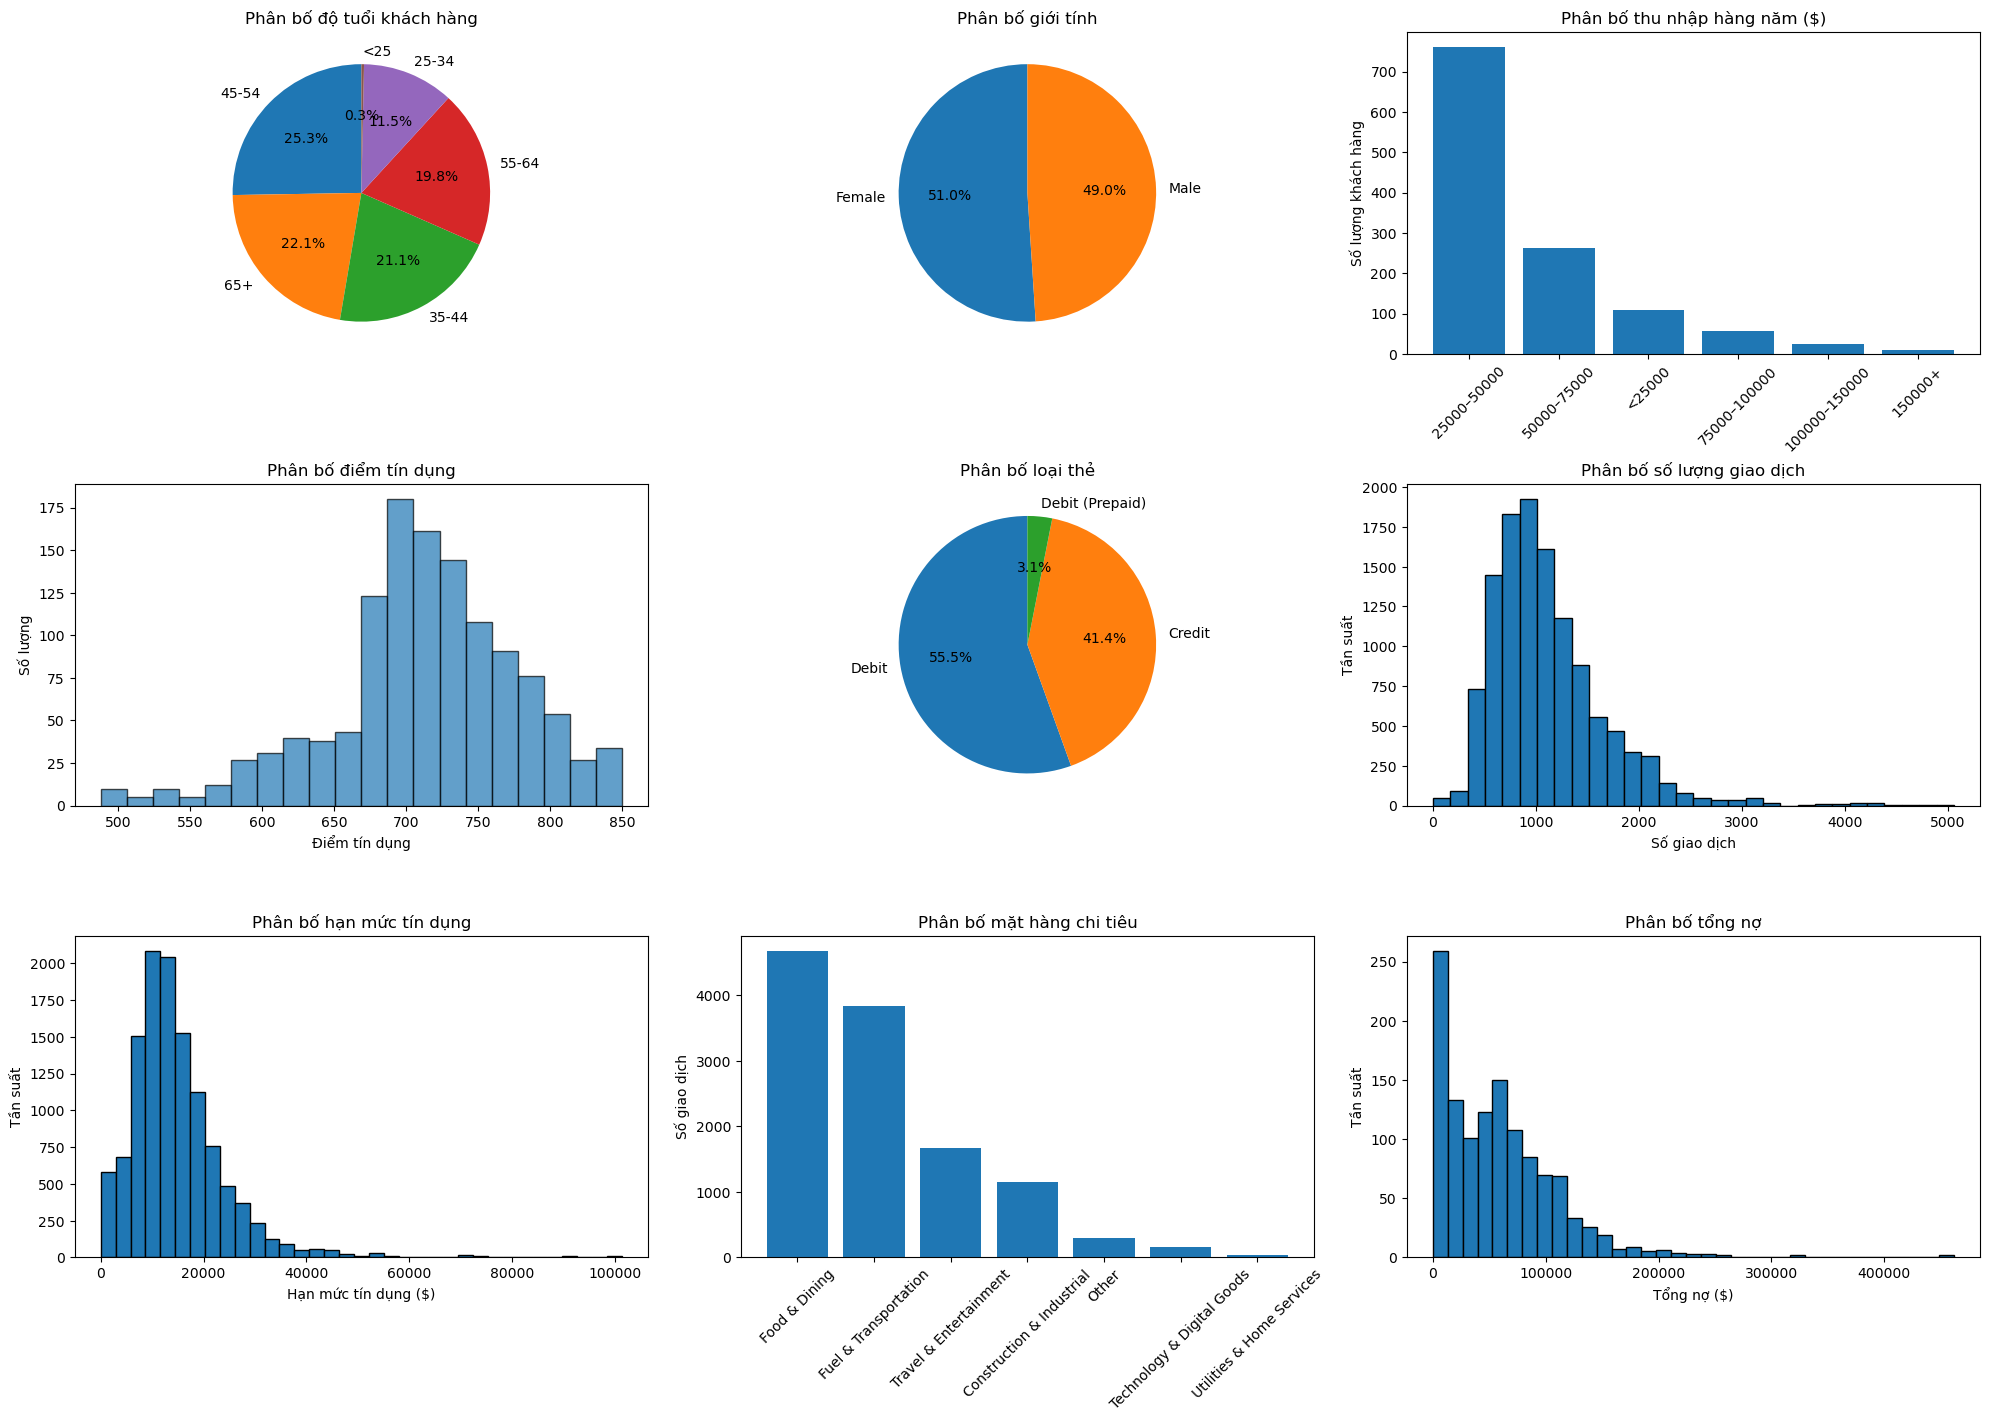

In [513]:
# EDA tổng quan 
# Phân bố các biến trong toàn bộ khung thời gian (9 năm)
from seaborn import palettes


plt.figure(figsize=(20, 15))

# Phân bố độ tuổi - dùng client_static_info
plt.subplot(3, 3, 1)
age_dist = client_static_info['age_group'].value_counts()
plt.pie(age_dist.values, labels=age_dist.index, autopct='%1.1f%%', startangle=90)
plt.title('Phân bố độ tuổi khách hàng')

# Phân bố giới tính - dùng client_static_info
plt.subplot(3, 3, 2)
gender_dist = client_static_info['gender'].value_counts()
plt.pie(gender_dist.values, labels=gender_dist.index, autopct='%1.1f%%', startangle=90)
plt.title('Phân bố giới tính')

# Phân bố thu nhập - dùng client_static_info
plt.subplot(3, 3, 3)
income_dist = client_static_info['group_income'].value_counts()
plt.bar(range(len(income_dist)), income_dist.values)
plt.title('Phân bố thu nhập hàng năm ($)')
plt.xticks(range(len(income_dist)), income_dist.index, rotation=45)
plt.ylabel('Số lượng khách hàng')

# Phân bố điểm tín dụng - dùng client_static_info
plt.subplot(3, 3, 4)
plt.hist(client_static_info['credit_score'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Phân bố điểm tín dụng')
plt.xlabel('Điểm tín dụng')
plt.ylabel('Số lượng')

# Phân bố loại thẻ tất cả khách hàng dùng trong 9 năm 
plt.subplot(3, 3, 5)
card_dist = final_client_df['card_type'].value_counts()
plt.pie(card_dist.values, labels=card_dist.index, autopct='%1.1f%%', startangle=90)
plt.title('Phân bố loại thẻ')

# Tần suất thực hiện giao dịch của các khách hàng mỗi năm trong giai đoạn 2010-2019 - dùng final_client_df
plt.subplot(3, 3, 6)
plt.hist(final_client_df['total_transactions'], bins=30, edgecolor='black')
plt.title('Phân bố số lượng giao dịch')
plt.xlabel('Số giao dịch')
plt.ylabel('Tần suất')

#Phân bố hạn mức tín dụng các khách hàng mỗi năm trong giai đoạn 2010-2019
plt.subplot(3, 3, 7)
plt.hist(final_client_df['credit_limit'], bins=35, edgecolor='black')
plt.title('Phân bố hạn mức tín dụng')
plt.xlabel('Hạn mức tín dụng ($)')
plt.ylabel('Tần suất')

#Phân bố hạn mặt hàng chi tiêu các khách hàng mỗi năm trong giai đoạn 2010-2019
plt.subplot(3, 3, 8)
category_counts = client_dynamic_info['top_category'].value_counts()
plt.bar(range(len(category_counts)), category_counts.values)
plt.title('Phân bố mặt hàng chi tiêu')
plt.xticks(range(len(category_counts)), category_counts.index, rotation=45)
plt.ylabel('Số giao dịch')

# Phân bố tổng nợ - dùng client_static_info
plt.subplot(3, 3, 9)
plt.hist(client_static_info['total_debt'], bins=35, edgecolor='black')
plt.title('Phân bố tổng nợ')
plt.xlabel('Tổng nợ ($)')
plt.ylabel('Tần suất')

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

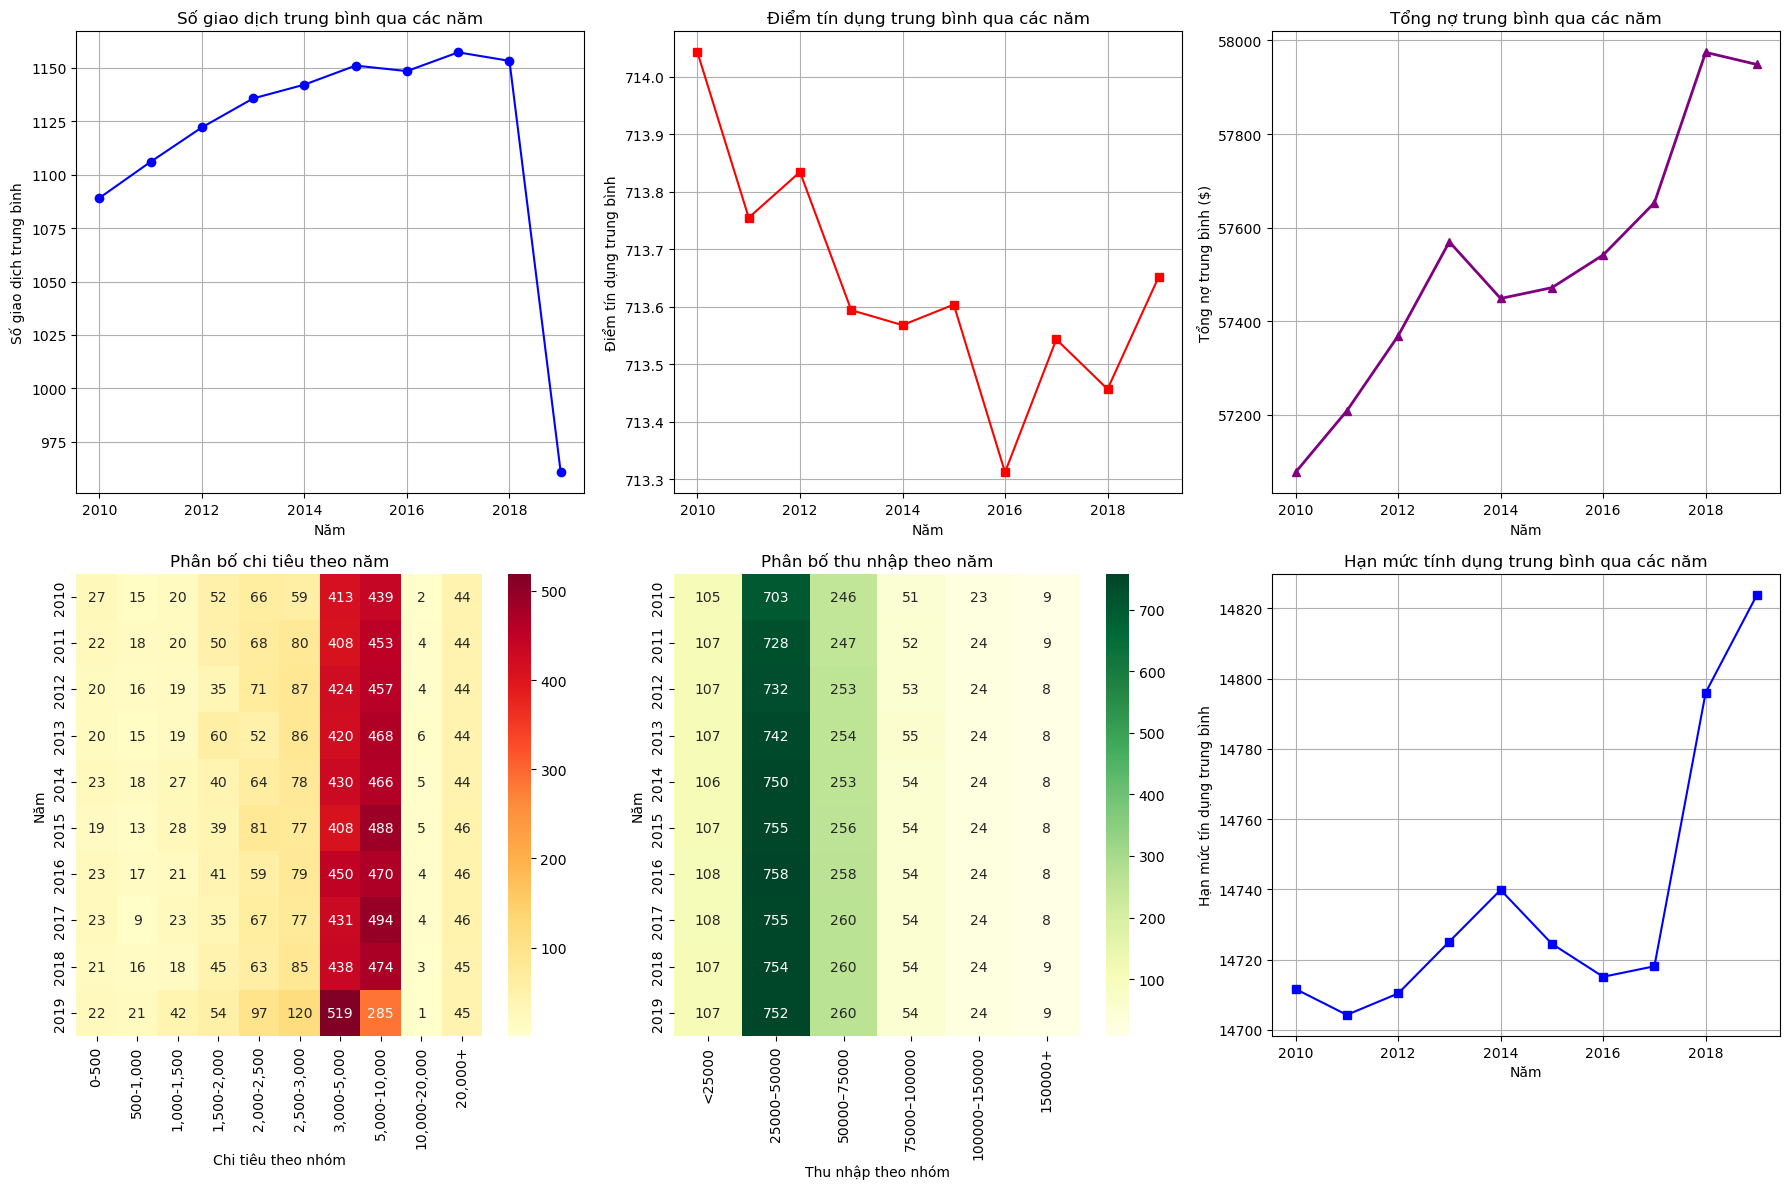

In [514]:
plt.figure(figsize=(18, 12))

# Số giao dịch trung bình theo năm 
plt.subplot(2, 3, 1)
yearly_transactions = client_dynamic_info.groupby('year')['total_transactions'].mean()
plt.plot(yearly_transactions.index, yearly_transactions.values, marker='o', color='blue')
plt.title('Số giao dịch trung bình qua các năm')
plt.xlabel('Năm')
plt.ylabel('Số giao dịch trung bình')
plt.grid(True)


# Điểm tín dụng trung bình theo năm
yearly_credit_merged = final_client_df.groupby('year')['credit_score'].mean()
plt.subplot(2, 3, 2)
plt.plot(yearly_credit_merged.index, yearly_credit_merged.values, marker='s', color='red')
plt.title('Điểm tín dụng trung bình qua các năm')
plt.xlabel('Năm')
plt.ylabel('Điểm tín dụng trung bình')
plt.grid(True)

# Tổng nợ trung bình theo năm 
plt.subplot(2, 3, 3)
yearly_total_debt = final_client_df.groupby('year')['total_debt'].mean()
plt.plot(yearly_total_debt.index, yearly_total_debt.values, marker='^', color='purple', linewidth=2)
plt.title('Tổng nợ trung bình qua các năm')
plt.xlabel('Năm')
plt.ylabel('Tổng nợ trung bình ($)')
plt.grid(True)

# Phân bố chi tiêu theo năm 
plt.subplot(2, 3, 4)
yearly_group_spent = pd.crosstab(client_dynamic_info['year'], client_dynamic_info['group_spent'])
sns.heatmap(yearly_group_spent, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Phân bố chi tiêu theo năm')
plt.xlabel('Chi tiêu theo nhóm')
plt.ylabel('Năm')

# Phân bố thu nhập theo năm 
plt.subplot(2, 3, 5)
yearly_group_income = pd.crosstab(final_client_df['year'], final_client_df['group_income'])
sns.heatmap(yearly_group_income, annot=True, cmap='YlGn', fmt='d')
plt.title('Phân bố thu nhập theo năm')
plt.xlabel('Thu nhập theo nhóm')
plt.ylabel('Năm')

# Xu hướng hạn mức tín dụng theo năm
yearly_credit_limit = final_client_df.groupby('year')['credit_limit'].mean()
plt.subplot(2, 3, 6)
plt.plot(yearly_credit_limit.index, yearly_credit_limit.values, marker='s', color='blue')
plt.title('Hạn mức tính dụng trung bình qua các năm')
plt.xlabel('Năm')
plt.ylabel('Hạn mức tín dụng trung bình')
plt.grid(True)

plt.tight_layout()
plt.show()


/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_55542/625299890.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  card_spent = final_client_df.groupby(['card_type', 'age_group'])['total_spent'].mean().unstack()
/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_55542/625299890.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  card_income = final_client_df.groupby(['card_type', 'age_group'])['yearly_income'].mean().unstack()


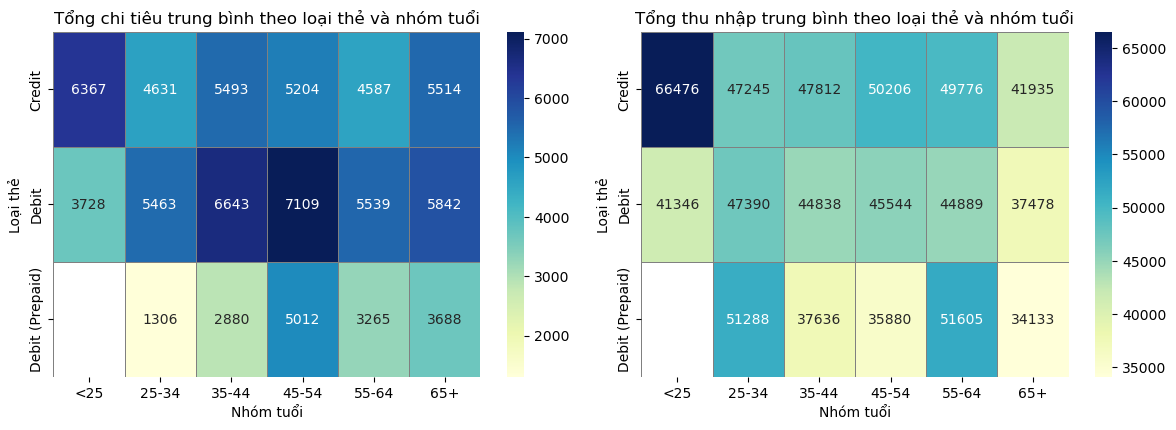

In [515]:
plt.figure(figsize=(12, 8))

#Heatmap mối quan hệ chi tiêu trung bình theo loại thẻ và nhóm tuổi
plt.subplot(2, 2, 1)
card_spent = final_client_df.groupby(['card_type', 'age_group'])['total_spent'].mean().unstack()
sns.heatmap(card_spent, annot=True, fmt='.0f',cmap='YlGnBu', 
            linewidths=0.5, linecolor='gray')
plt.title('Tổng chi tiêu trung bình theo loại thẻ và nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Loại thẻ')
#plt.tight_layout()
#plt.show()

#Heatmap mối quan hệ thu nhập trung bình theo loại thẻ và nhóm tuổi
plt.subplot(2, 2, 2)
card_income = final_client_df.groupby(['card_type', 'age_group'])['yearly_income'].mean().unstack()
sns.heatmap(card_income, annot=True, fmt='.0f',cmap='YlGnBu', 
            linewidths=0.5, linecolor='gray')
plt.title('Tổng thu nhập trung bình theo loại thẻ và nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Loại thẻ')

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

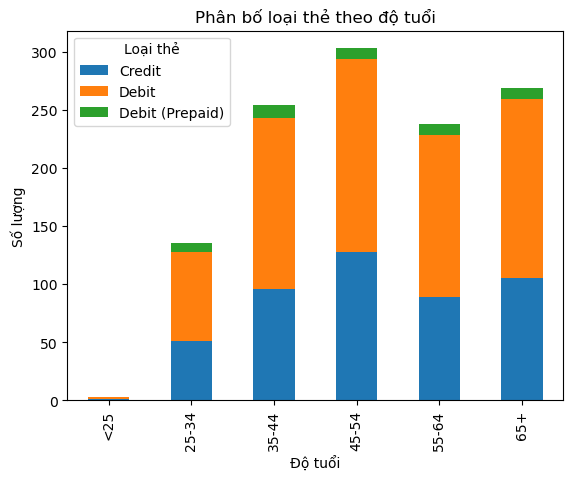

In [516]:
# Phân bố loại thẻ theo độ tuổi
final_client_df = final_client_df.drop_duplicates(subset='client_id', keep='first')
plt.figure(figsize=(12, 6))
card_age = pd.crosstab(final_client_df['age_group'], final_client_df['card_type'])
card_age.plot(kind='bar', stacked=True)
plt.title('Phân bố loại thẻ theo độ tuổi')
plt.xlabel('Độ tuổi')
plt.ylabel('Số lượng')
plt.legend(title='Loại thẻ')
plt.show()

/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_55542/4088069842.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_income_credit_limit_all = final_client_df.groupby(['age_group', 'group_income'])['credit_limit'].mean().unstack()
/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_55542/4088069842.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_income_credit_limit_only = credit_card_users.groupby(['age_group', 'group_income'])['credit_limit'].mean().unstack()
/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_55542/4088069842.py:54: FutureWarning: The default of observ

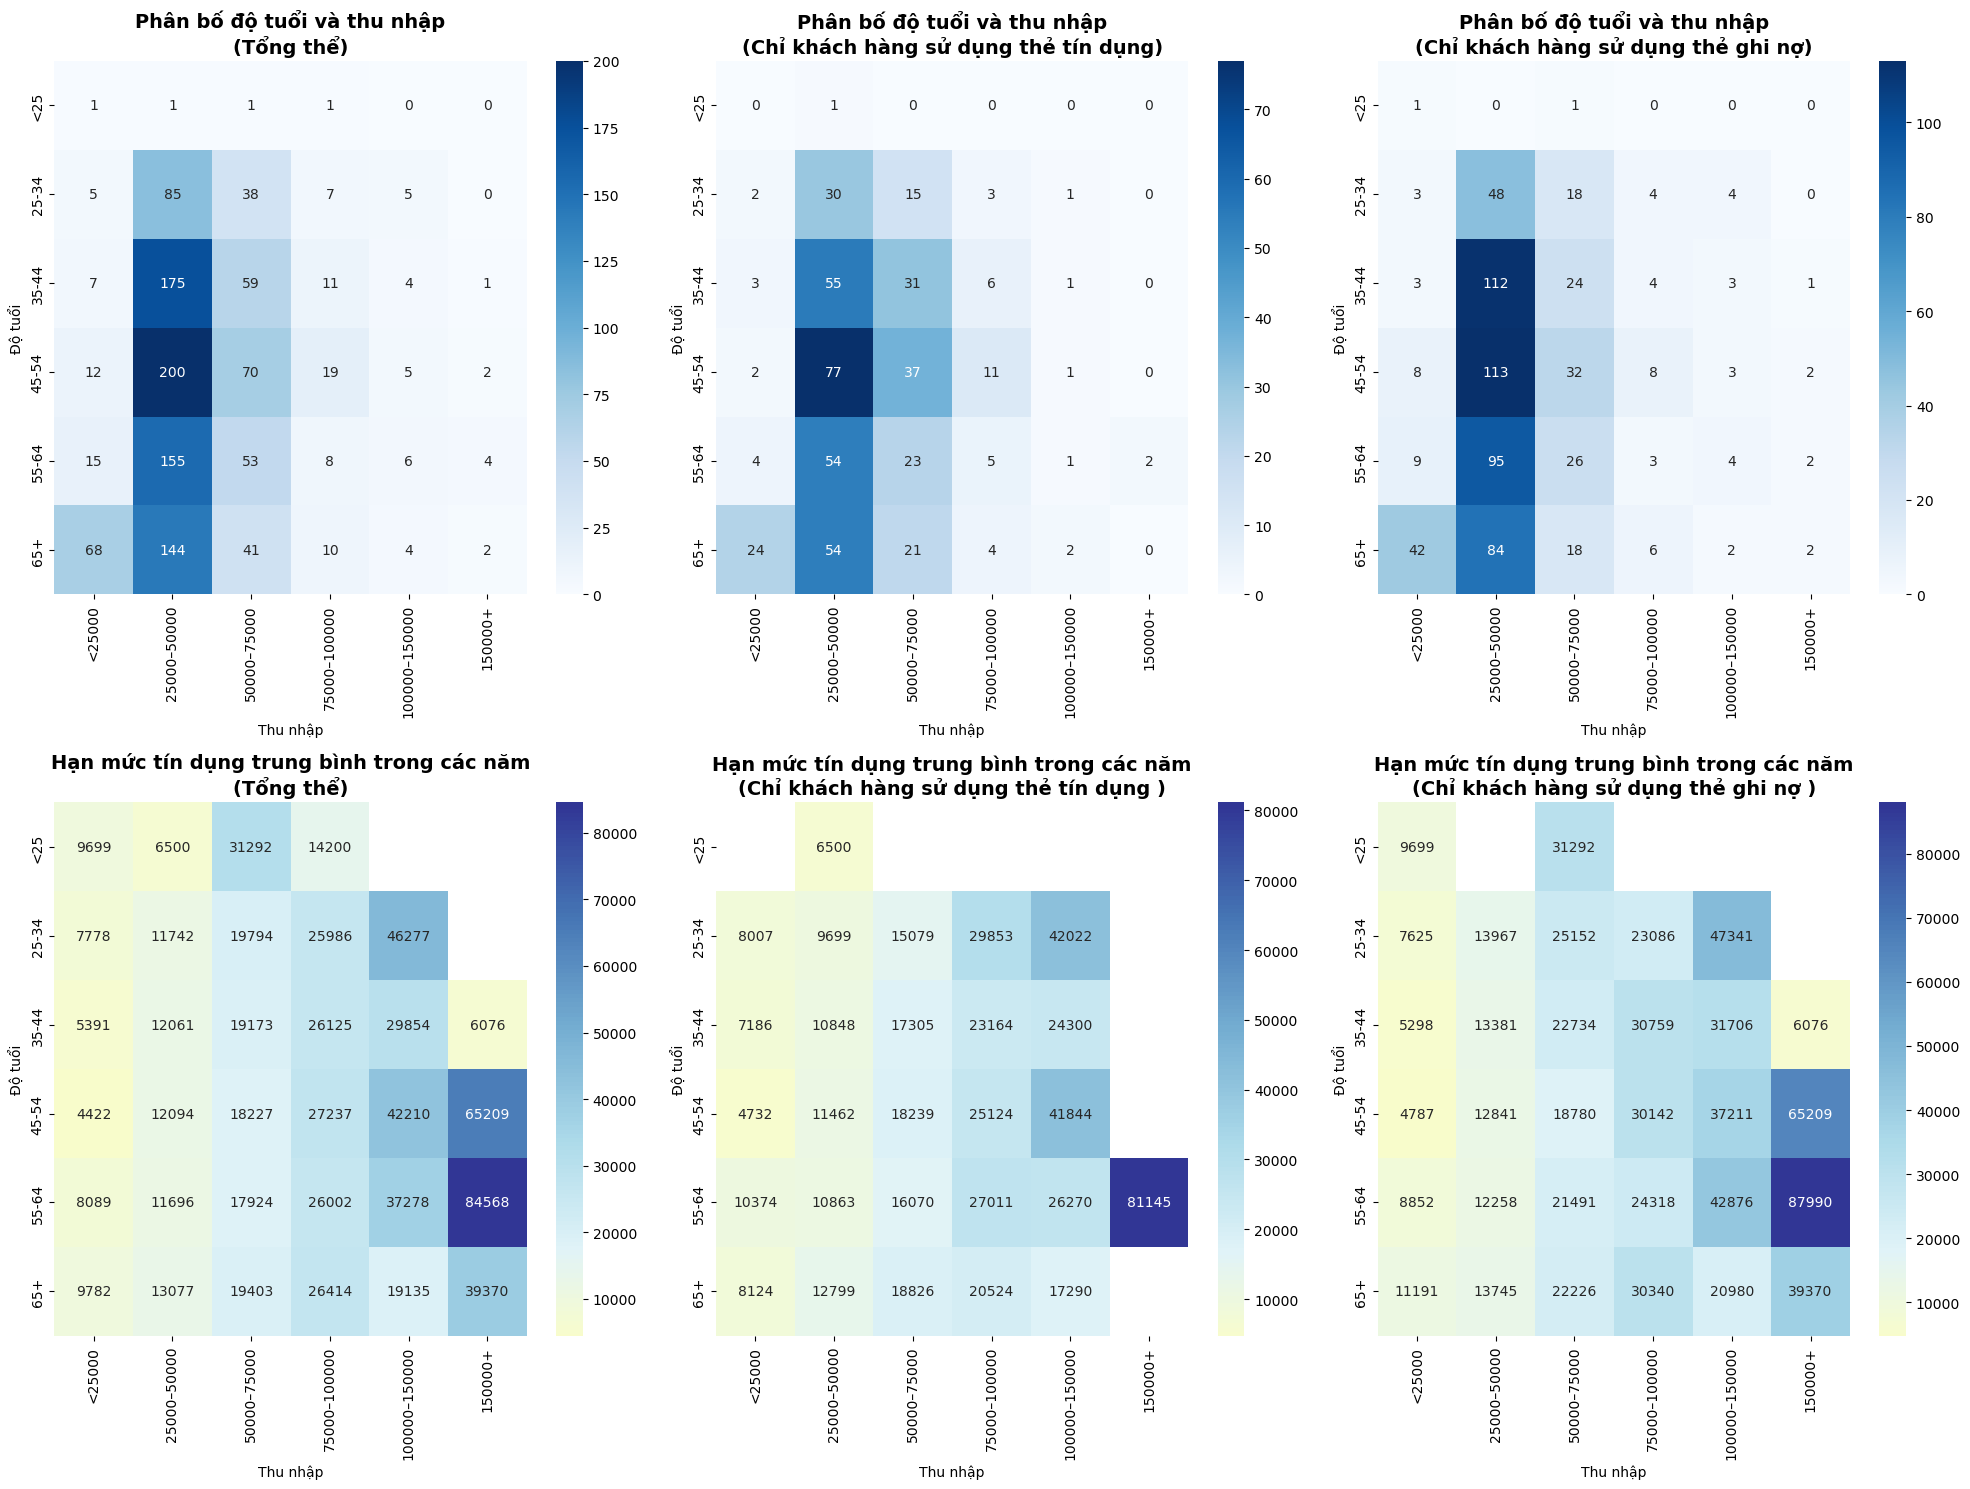

In [517]:
# Tạo dataset cho credit card users và debit card users
credit_card_users = final_client_df[final_client_df['card_type'] == 'Credit']
debit_card_users = final_client_df[final_client_df['card_type'] == 'Debit']
debit_card_users = debit_card_users.drop_duplicates(subset='client_id', keep='first')
credit_card_users = credit_card_users.drop_duplicates(subset='client_id', keep='first')

# Tạo heatmap
plt.figure(figsize=(20, 15))
# 1. SO SÁNH PHÂN BỐ ĐỘ TUỔI VS THU NHẬP, XEM SỰ KHÁC NHAU CỦA NHÂN KHẨU HỌC

# Tổng thể
plt.subplot(2, 3, 1)
age_income_all = pd.crosstab(final_client_df['age_group'], final_client_df['group_income'])
sns.heatmap(age_income_all, annot=True, cmap='Blues', fmt='d')
plt.title('Phân bố độ tuổi và thu nhập\n(Tổng thể)', fontsize=14, fontweight='bold')
plt.xlabel('Thu nhập')
plt.ylabel('Độ tuổi')

# Chỉ credit card users
plt.subplot(2, 3, 2)
age_income_credit = pd.crosstab(credit_card_users['age_group'], credit_card_users['group_income'])
sns.heatmap(age_income_credit, annot=True, cmap='Blues', fmt='d')
plt.title('Phân bố độ tuổi và thu nhập\n(Chỉ khách hàng sử dụng thẻ tín dụng)', fontsize=14, fontweight='bold')
plt.xlabel('Thu nhập')
plt.ylabel('Độ tuổi')

plt.subplot(2, 3, 3)
age_income_debit = pd.crosstab(debit_card_users['age_group'], debit_card_users['group_income'])
sns.heatmap(age_income_debit, annot=True, cmap='Blues', fmt='d')
plt.title('Phân bố độ tuổi và thu nhập\n(Chỉ khách hàng sử dụng thẻ ghi nợ)', fontsize=14, fontweight='bold')
plt.xlabel('Thu nhập')
plt.ylabel('Độ tuổi')


# 2. SO SÁNH ĐIỂM TÍN DỤNG THEO ĐỘ TUỔI VÀ THU NHẬP

# Tổng thể
plt.subplot(2, 3, 4)
age_income_credit_limit_all = final_client_df.groupby(['age_group', 'group_income'])['credit_limit'].mean().unstack()
sns.heatmap(age_income_credit_limit_all, annot=True, cmap='RdYlBu', fmt='.0f', center=700)
plt.title('Hạn mức tín dụng trung bình trong các năm\n(Tổng thể)', fontsize=14, fontweight='bold')
plt.xlabel('Thu nhập')
plt.ylabel('Độ tuổi')

# Chỉ credit card users
plt.subplot(2, 3, 5)
age_income_credit_limit_only = credit_card_users.groupby(['age_group', 'group_income'])['credit_limit'].mean().unstack()
sns.heatmap(age_income_credit_limit_only, annot=True, cmap='RdYlBu', fmt='.0f', center=700)
plt.title('Hạn mức tín dụng trung bình trong các năm\n(Chỉ khách hàng sử dụng thẻ tín dụng )', fontsize=14, fontweight='bold')
plt.xlabel('Thu nhập')
plt.ylabel('Độ tuổi')

plt.subplot(2, 3, 6)
age_income_debit_limit_only = debit_card_users.groupby(['age_group', 'group_income'])['credit_limit'].mean().unstack()
sns.heatmap(age_income_debit_limit_only, annot=True, cmap='RdYlBu', fmt='.0f', center=700)
plt.title('Hạn mức tín dụng trung bình trong các năm\n(Chỉ khách hàng sử dụng thẻ ghi nợ )', fontsize=14, fontweight='bold')
plt.xlabel('Thu nhập')
plt.ylabel('Độ tuổi')

plt.tight_layout()
plt.show()


/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_55542/3401116412.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_trans_all = final_client_df.groupby('age_group')['total_transactions'].mean()
/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_55542/3401116412.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_trans_credit = credit_card_users.groupby('age_group')['total_transactions'].mean()
/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_55542/3401116412.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version o

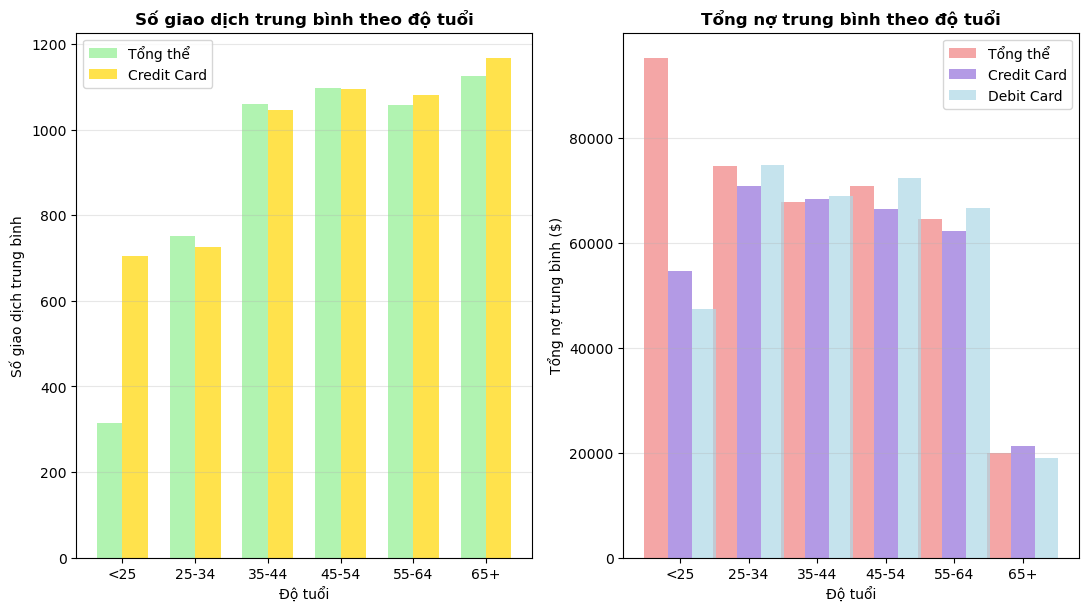

In [518]:
# 3. SO SÁNH SỐ GIAO DỊCH VÀ TỔNG NỢ TRUNG BÌNH THEO ĐỘ TUỔI
plt.figure(figsize=(20, 15))

# Số giao dịch trung bình theo độ tuổi
plt.subplot(2, 3, 1)
age_trans_all = final_client_df.groupby('age_group')['total_transactions'].mean()
age_trans_credit = credit_card_users.groupby('age_group')['total_transactions'].mean()
age_groups = final_client_df['age_group'].unique()
x = np.arange(len(age_groups))
width = 0.35  

plt.bar(x - width/2, age_trans_all.values, width, label='Tổng thể', alpha=0.7, color='lightgreen')
plt.bar(x + width/2, age_trans_credit.values, width, label='Credit Card', alpha=0.7, color='gold')
plt.title('Số giao dịch trung bình theo độ tuổi', fontsize=12, fontweight='bold')
plt.xlabel('Độ tuổi')
plt.ylabel('Số giao dịch trung bình')
plt.xticks(x, age_trans_all.index)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Tổng nợ trung bình theo độ tuổi
plt.subplot(2, 3, 2)
age_debt_all = final_client_df.groupby('age_group')['total_debt'].mean()
age_debt_credit = credit_card_users.groupby('age_group')['total_debt'].mean()
age_debt_debit = debit_card_users.groupby('age_group')['total_debt'].mean()

plt.bar(x - width, age_debt_all.values, width, label='Tổng thể', alpha=0.7, color='lightcoral')
plt.bar(x, age_debt_credit.values, width, label='Credit Card', alpha=0.7, color='mediumpurple')
plt.bar(x + width, age_debt_debit.values, width, label='Debit Card', alpha=0.7, color='lightblue')
plt.title('Tổng nợ trung bình theo độ tuổi', fontsize=12, fontweight='bold')
plt.xlabel('Độ tuổi')
plt.ylabel('Tổng nợ trung bình ($)')
plt.xticks(x, age_debt_all.index)
plt.legend()
plt.grid(axis='y', alpha=0.3)

In [519]:
#_________Hết_EDA_________

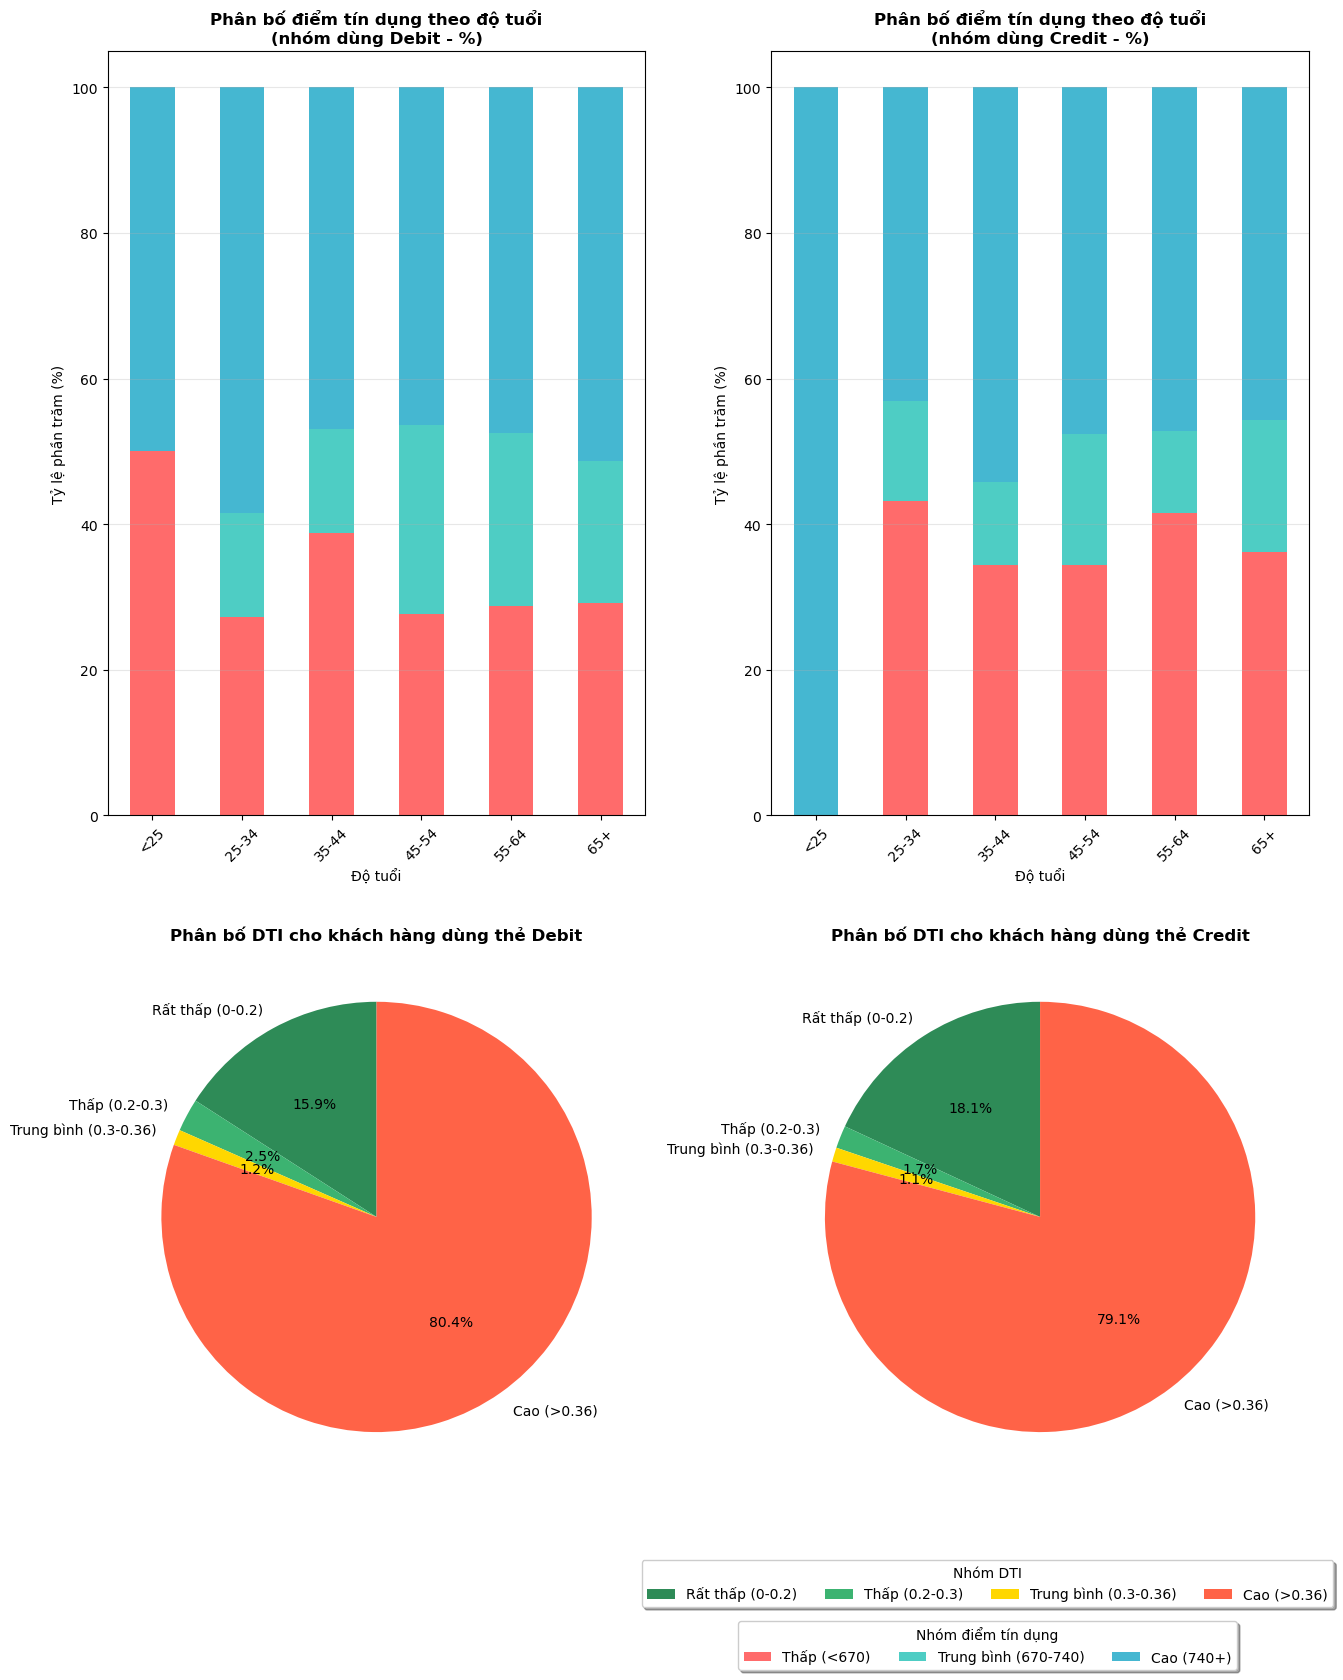

In [520]:
def categorize_credit_score(score):
    if score >= 740:
        return 'Cao (740+)'
    elif score >= 670:
        return 'Trung bình (670-740)'
    else:
        return 'Thấp (<670)'

# Áp dụng phân loại cho dataset
debit_card_users['credit_score_group'] = debit_card_users['credit_score'].apply(categorize_credit_score)
credit_card_users['credit_score_group'] = credit_card_users['credit_score'].apply(categorize_credit_score)

# Công thức tính DTI
debit_card_users['dti_ratio'] = debit_card_users['total_debt'] / debit_card_users['yearly_income']
credit_card_users['dti_ratio'] = credit_card_users['total_debt'] / credit_card_users['yearly_income']

# Đặt bảng màu
credit_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
credit_labels = ['Thấp (<670)', 'Trung bình (670-740)', 'Cao (740+)']

dti_colors = ['#2E8B57', '#3CB371', '#FFD700', '#FF6347', '#D3D3D3']
dti_labels = ['Rất thấp (0-0.2)', 'Thấp (0.2-0.3)', 'Trung bình (0.3-0.36)', 'Cao (>0.36)', 'Không xác định']

# SO SÁNH PHÂN BỐ ĐIỂM TÍN DỤNG VÀ DTI
plt.figure(figsize=(20, 18))

# Phân bố điểm tín dụng theo độ tuổi - Debit Card
plt.subplot(2, 3, 1)
credit_age_debit = pd.crosstab(debit_card_users['age_group'], debit_card_users['credit_score_group'])
credit_age_debit_percent = credit_age_debit.div(credit_age_debit.sum(axis=1), axis=0) * 100
credit_age_debit_percent.plot(kind='bar', stacked=True, ax=plt.gca(), color=credit_colors, legend=False)
plt.title('Phân bố điểm tín dụng theo độ tuổi\n(nhóm dùng Debit - %)', fontsize=12, fontweight='bold')
plt.xlabel('Độ tuổi')
plt.ylabel('Tỷ lệ phần trăm (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Phân bố điểm tín dụng theo độ tuổi - Credit Card
plt.subplot(2, 3, 2)
credit_age_credit = pd.crosstab(credit_card_users['age_group'], credit_card_users['credit_score_group'])
credit_age_credit_percent = credit_age_credit.div(credit_age_credit.sum(axis=1), axis=0) * 100
credit_age_credit_percent.plot(kind='bar', stacked=True, ax=plt.gca(), color=credit_colors, legend=False)
plt.title('Phân bố điểm tín dụng theo độ tuổi\n(nhóm dùng Credit - %)', fontsize=12, fontweight='bold')
plt.xlabel('Độ tuổi')
plt.ylabel('Tỷ lệ phần trăm (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.figlegend(handles=[plt.Rectangle((0,0),1,1, fc=color) for color in credit_colors],
            labels=credit_labels,
            title='Nhóm điểm tín dụng',
            loc='upper center',
            bbox_to_anchor=(0.5, 0.05),
            ncol=3,
            fontsize=10,
            frameon=True,
            fancybox=True,
            shadow=True)

# Phân nhóm DTI
def categorize_dti(dti):
    if dti <= 0.2:
        return 'Rất thấp (0-0.2)'
    elif dti <= 0.3:
        return 'Thấp (0.2-0.3)'
    elif dti <= 0.36:
        return 'Trung bình (0.3-0.36)'
    else:
        return 'Cao (>0.36)'

debit_card_users['dti_group'] = debit_card_users['dti_ratio'].apply(categorize_dti)
credit_card_users['dti_group'] = credit_card_users['dti_ratio'].apply(categorize_dti)

dti_debit = debit_card_users['dti_group'].value_counts(normalize=True) * 100
dti_credit = credit_card_users['dti_group'].value_counts(normalize=True) * 100

# Chỉnh thứ tự bảng màu
dti_order = ['Rất thấp (0-0.2)', 'Thấp (0.2-0.3)', 'Trung bình (0.3-0.36)', 'Cao (>0.36)']
dti_debit = dti_debit.reindex(dti_order)
dti_credit = dti_credit.reindex(dti_order)

# Pie chart cho Debit card 
plt.subplot(2, 3, 4)
plt.pie(dti_debit.values, labels=dti_debit.index, autopct='%1.1f%%', startangle=90,
        colors=dti_colors[:len(dti_debit)])
plt.title('Phân bố DTI cho khách hàng dùng thẻ Debit', fontsize=12, fontweight='bold')

# Pie chart cho credit card 
plt.subplot(2, 3, 5)
plt.pie(dti_credit.values, labels=dti_credit.index, autopct='%1.1f%%', startangle=90,
        colors=dti_colors[:len(dti_credit)])
plt.title('Phân bố DTI cho khách hàng dùng thẻ Credit', fontsize=12, fontweight='bold')

# Legend for DTI
plt.figlegend(handles=[plt.Rectangle((0,0),1,1, fc=color) for color in dti_colors[:4]],
            labels=dti_labels[:4],
            title='Nhóm DTI',
            loc='lower center',
            bbox_to_anchor=(0.5, 0.05),
            ncol=4,
            fontsize=10,
            frameon=True,
            fancybox=True,
            shadow=True)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  
plt.show()


Số lượng khách hàng DTI cao (Credit): 372
Số lượng khách hàng DTI rất thấp (Credit): 85


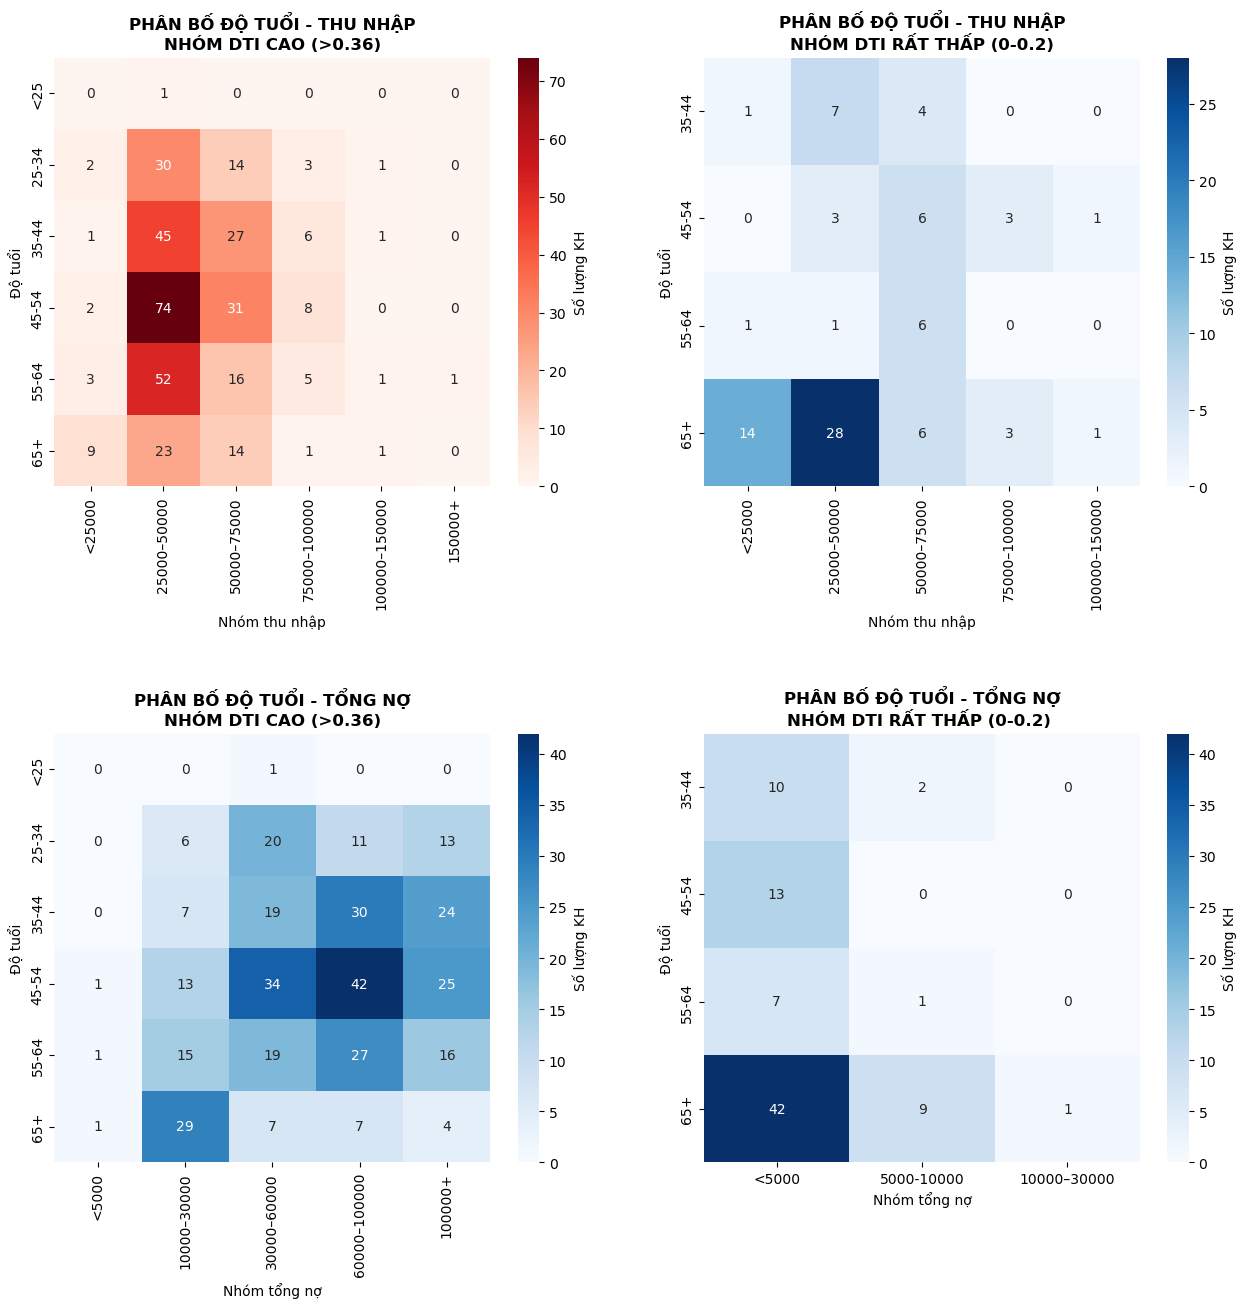

In [521]:
# Tạo các nhóm DTI từ credit_card_users
credit_card_users = credit_card_users.drop_duplicates(subset='client_id', keep='first')
high_dti_credit = credit_card_users[credit_card_users['dti_group'] == 'Cao (>0.36)']
very_low_dti_credit = credit_card_users[credit_card_users['dti_group'] == 'Rất thấp (0-0.2)']

print(f"Số lượng khách hàng DTI cao (Credit): {len(high_dti_credit):,}")
print(f"Số lượng khách hàng DTI rất thấp (Credit): {len(very_low_dti_credit):,}")

# Tạo heatmap
plt.figure(figsize=(20, 14))

# Heatmap 1: Phân bố Thu nhập- độ tuổi - Nhóm DTI cao 
plt.subplot(2, 3, 1)
age_income_high_dti_credit = pd.crosstab(high_dti_credit['age_group'], high_dti_credit['group_income'])
sns.heatmap(age_income_high_dti_credit, annot=True, fmt='d', cmap='Reds', cbar_kws={'label': 'Số lượng KH'})
plt.title('PHÂN BỐ ĐỘ TUỔI - THU NHẬP\nNHÓM DTI CAO (>0.36)', fontsize=12, fontweight='bold')
plt.xlabel('Nhóm thu nhập')
plt.ylabel('Độ tuổi')

# Heatmap 2: Phân bố Thu nhập- độ tuổi - Nhóm DTI rất thấp 
plt.subplot(2, 3, 2)
age_income_very_low_dti_credit = pd.crosstab(very_low_dti_credit['age_group'], very_low_dti_credit['group_income'])
sns.heatmap(age_income_very_low_dti_credit, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Số lượng KH'})
plt.title('PHÂN BỐ ĐỘ TUỔI - THU NHẬP\nNHÓM DTI RẤT THẤP (0-0.2)', fontsize=12, fontweight='bold')
plt.xlabel('Nhóm thu nhập')
plt.ylabel('Độ tuổi')

# Heatmap 3: Phân bố Tổng nợ - độ tuổi - Nhóm DTI cao 
plt.subplot(2, 3, 4)
age_debt_high_dti_credit = pd.crosstab(high_dti_credit['age_group'], high_dti_credit['group_debt'])
sns.heatmap(age_debt_high_dti_credit, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Số lượng KH'})
plt.title('PHÂN BỐ ĐỘ TUỔI - TỔNG NỢ\nNHÓM DTI CAO (>0.36)', fontsize=12, fontweight='bold')
plt.xlabel('Nhóm tổng nợ')
plt.ylabel('Độ tuổi')

# Heatmap 4: Phân bố Tổng nợ - độ tuổi - Nhóm DTI cao 
plt.subplot(2, 3, 5)
age_debt_very_low_dti_credit = pd.crosstab(very_low_dti_credit['age_group'], very_low_dti_credit['group_debt'])
sns.heatmap(age_debt_very_low_dti_credit, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Số lượng KH'})
plt.title('PHÂN BỐ ĐỘ TUỔI - TỔNG NỢ\nNHÓM DTI RẤT THẤP (0-0.2) ', fontsize=12, fontweight='bold')
plt.xlabel('Nhóm tổng nợ')
plt.ylabel('Độ tuổi')

plt.tight_layout(pad=4.0)  
plt.show()


Số lượng khách hàng dùng credit card: 470
Tỷ lệ: 38.6% tổng số khách hàng
Tỷ lệ sử dụng Credit card để chi tiêu cho du lịch cao hơn so với tổng thể gần 4%


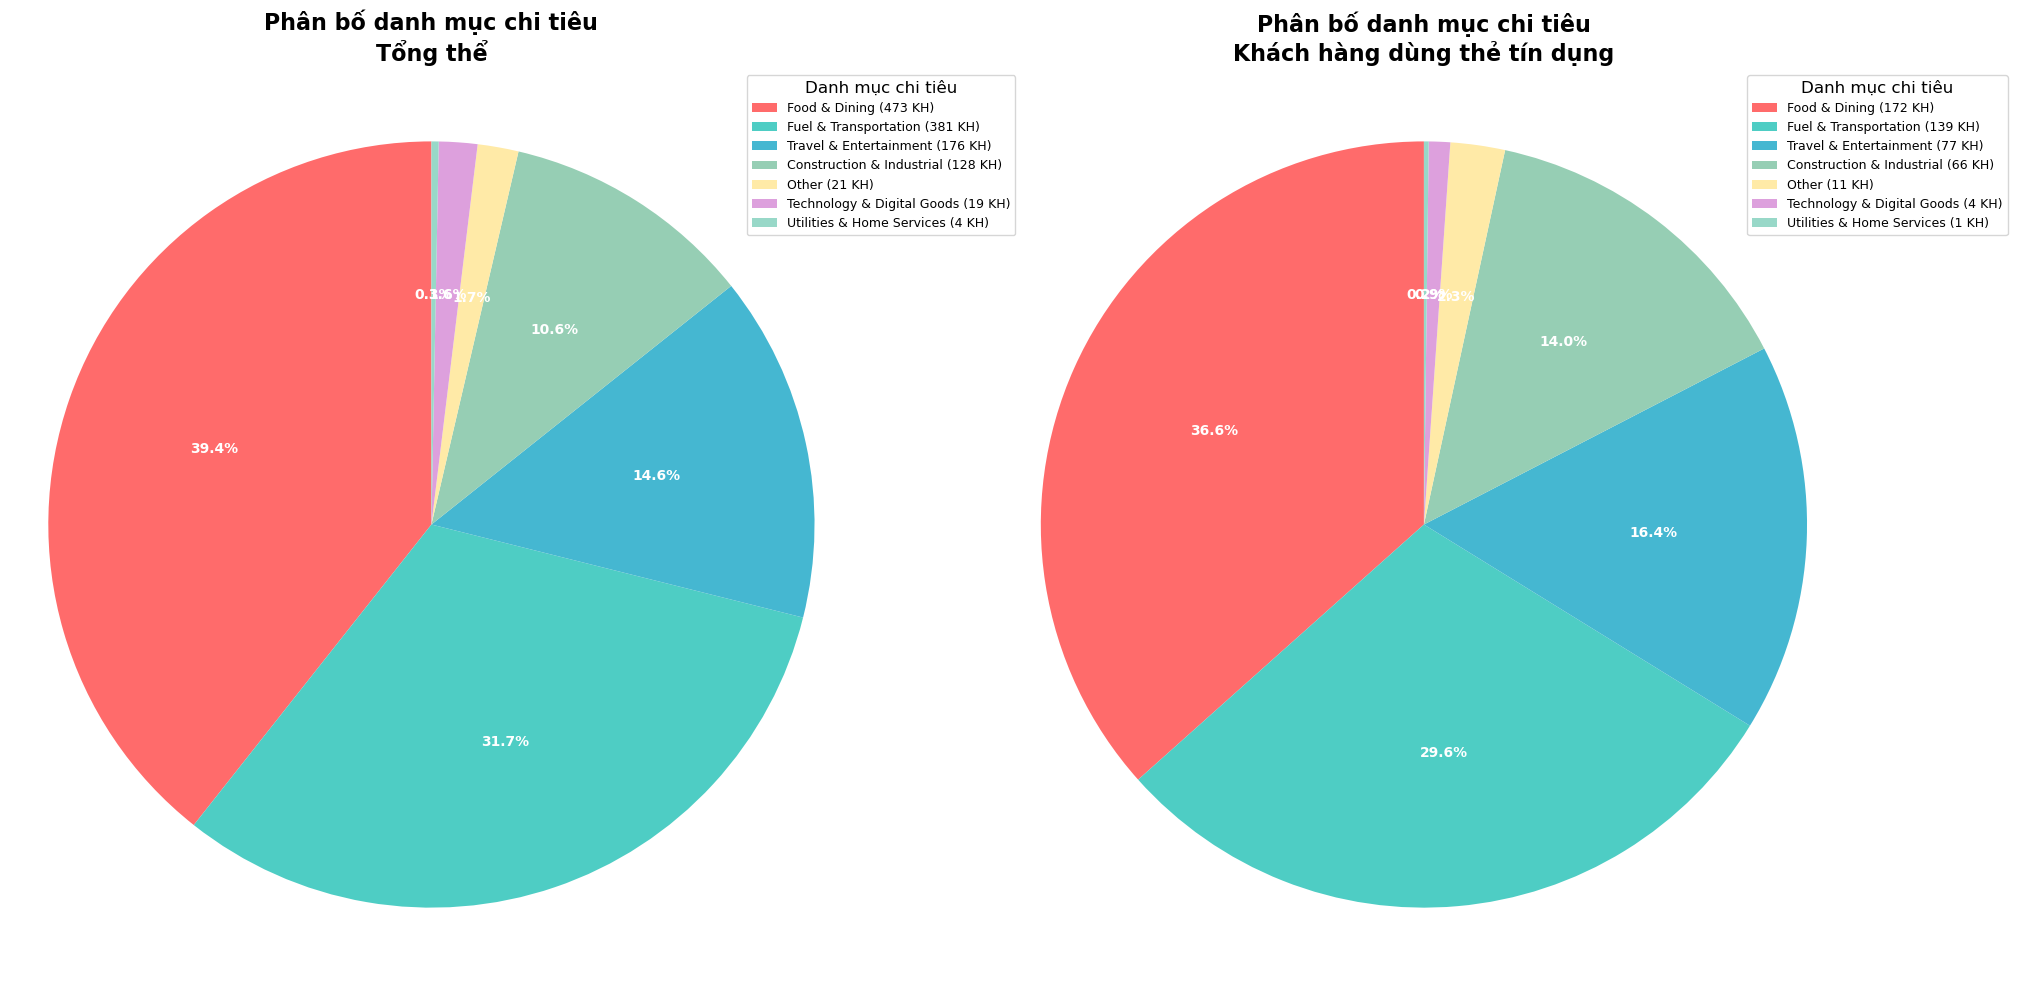

In [522]:
print(f"Số lượng khách hàng dùng credit card: {len(credit_card_users):,}")
print(f"Tỷ lệ: {len(credit_card_users)/len(final_client_df)*100:.1f}% tổng số khách hàng")
print('Tỷ lệ sử dụng Credit card để chi tiêu cho du lịch cao hơn so với tổng thể gần 4%') 

# SO SÁNH PHÂN BỐ DANH MỤC CHI TIÊU - TỔNG THỂ vs CREDIT CARD
plt.figure(figsize=(20, 10))

# Tính toán phần trăm cho cả hai nhóm
category_counts_all = final_client_df['top_category'].value_counts()
category_percent_all = (category_counts_all / len(final_client_df) * 100).round(1)

category_counts_credit = credit_card_users['top_category'].value_counts()
category_percent_credit = (category_counts_credit / len(credit_card_users) * 100).round(1)

# Tạo màu sắc thống nhất cho cả hai pie chart
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8']

# Pie Chart 1: Tổng thể
plt.subplot(1, 2, 1)
wedges1, texts1, autotexts1 = plt.pie(category_percent_all.values, 
                                      colors=colors,
                                      autopct='%1.1f%%',
                                      startangle=90,
                                      textprops={'fontsize': 10, 'fontweight': 'bold'})

# Làm đẹp phần trăm bên trong
for autotext in autotexts1:
    autotext.set_color('white')

# Tạo chú thích
legend_labels1 = [f'{category} ({count:,} KH)' for category, count in category_counts_all.items()]
plt.legend(wedges1, legend_labels1, 
           title="Danh mục chi tiêu",
           title_fontsize=12,
           loc="upper right",
           bbox_to_anchor=(1.2, 1.0),
           fontsize=9)

plt.title('Phân bố danh mục chi tiêu\nTổng thể', fontsize=16, fontweight='bold')
plt.axis('equal')

# Pie Chart 2: Credit Card Users
plt.subplot(1, 2, 2)
wedges2, texts2, autotexts2 = plt.pie(category_percent_credit.values, 
                                      colors=colors,
                                      autopct='%1.1f%%',
                                      startangle=90,
                                      textprops={'fontsize': 10, 'fontweight': 'bold'})

# Làm đẹp phần trăm bên trong
for autotext in autotexts2:
    autotext.set_color('white')

# Tạo chú thích
legend_labels2 = [f'{category} ({count:,} KH)' for category, count in category_counts_credit.items()]
plt.legend(wedges2, legend_labels2, 
           title="Danh mục chi tiêu",
           title_fontsize=12,
           loc="upper right",
           bbox_to_anchor=(1.2, 1.0),
           fontsize=9)

plt.title('Phân bố danh mục chi tiêu\nKhách hàng dùng thẻ tín dụng', fontsize=16, fontweight='bold')
plt.axis('equal')

plt.tight_layout()
plt.show()

/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_55542/1599445574.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category_spent_high_dti = top3_data_high_dti.groupby(['age_group', 'top_category'])['total_spent'].sum().unstack()
/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_55542/1599445574.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category_spent_low_dti = top3_data_low_dti.groupby(['age_group', 'top_category'])['total_spent'].sum().unstack()


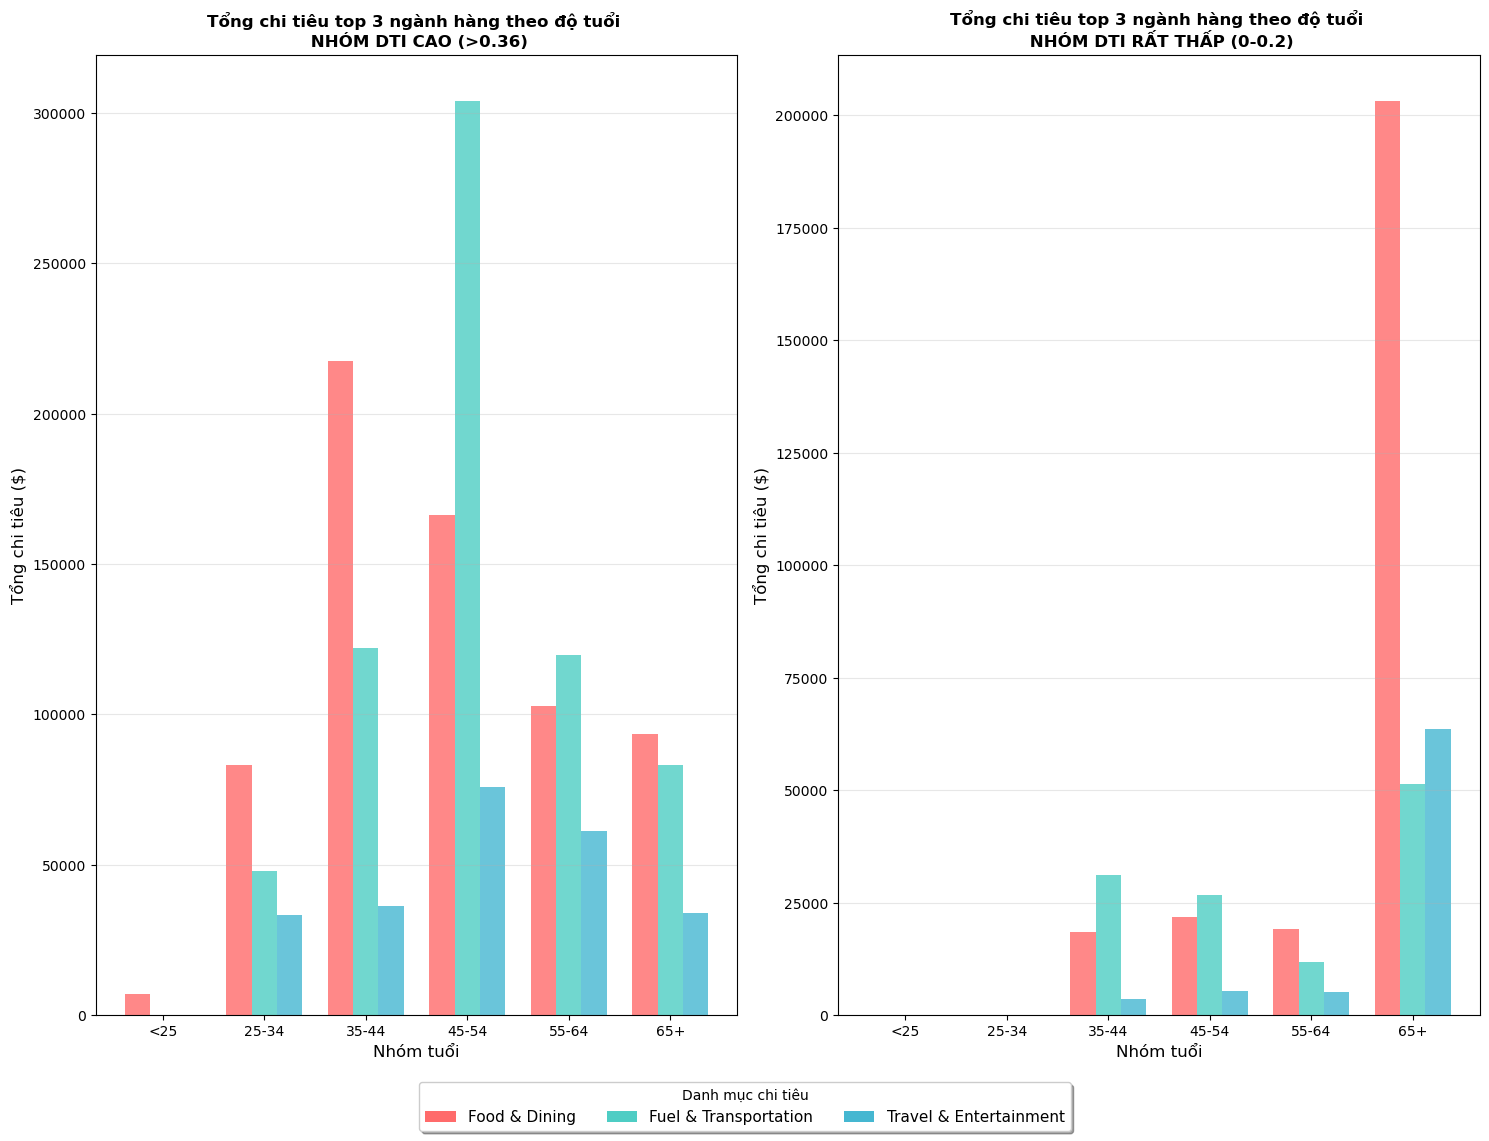

In [523]:
# Tìm top 3 category lớn nhất trong credit card users
top3_categories = credit_card_users['top_category'].value_counts().head(3).index.tolist()

# Lọc chỉ top 3 category cho cả hai nhóm
top3_data_high_dti = high_dti_credit[high_dti_credit['top_category'].isin(top3_categories)]
top3_data_low_dti = very_low_dti_credit[very_low_dti_credit['top_category'].isin(top3_categories)]

# Tính chi tiêu theo độ tuổi và category cho cả hai nhóm
age_category_spent_high_dti = top3_data_high_dti.groupby(['age_group', 'top_category'])['total_spent'].sum().unstack()
age_category_spent_low_dti = top3_data_low_dti.groupby(['age_group', 'top_category'])['total_spent'].sum().unstack()

# Vẽ biểu đồ so sánh
plt.figure(figsize=(15, 12))

# Màu sắc cố định cho 3 category
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

# Nhóm DTI cao
plt.subplot(1, 2, 1)
x = np.arange(len(age_category_spent_high_dti.index))
width = 0.25

for i, category in enumerate(top3_categories):
    plt.bar(x + i*width - width, age_category_spent_high_dti[category], width, 
            label=category, color=colors[i], alpha=0.8)

plt.xlabel('Nhóm tuổi', fontsize=12)
plt.ylabel('Tổng chi tiêu ($)', fontsize=12)
plt.title('Tổng chi tiêu top 3 ngành hàng theo độ tuổi \n NHÓM DTI CAO (>0.36)', 
          fontsize=12, fontweight='bold')
plt.xticks(x, age_category_spent_high_dti.index)
plt.grid(axis='y', alpha=0.3)

# Nhóm DTI rất thấp
plt.subplot(1, 2, 2)
for i, category in enumerate(top3_categories):
    plt.bar(x + i*width - width, age_category_spent_low_dti[category], width, 
            label=category, color=colors[i], alpha=0.8)

plt.xlabel('Nhóm tuổi', fontsize=12)
plt.ylabel('Tổng chi tiêu ($)', fontsize=12)
plt.title('Tổng chi tiêu top 3 ngành hàng theo độ tuổi \n NHÓM DTI RẤT THẤP (0-0.2)', 
          fontsize=12, fontweight='bold')
plt.xticks(x, age_category_spent_low_dti.index)
plt.grid(axis='y', alpha=0.3)

# Tạo chú thích chung cho cả 2 biểu đồ
plt.figlegend(handles=[plt.Rectangle((0,0),1,1, fc=colors[i]) for i in range(len(top3_categories))],
            labels=top3_categories,
            title='Danh mục chi tiêu',
            loc='upper center',
            bbox_to_anchor=(0.5, 0.05),
            ncol=3,
            fontsize=11,
            frameon=True,
            fancybox=True,
            shadow=True)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

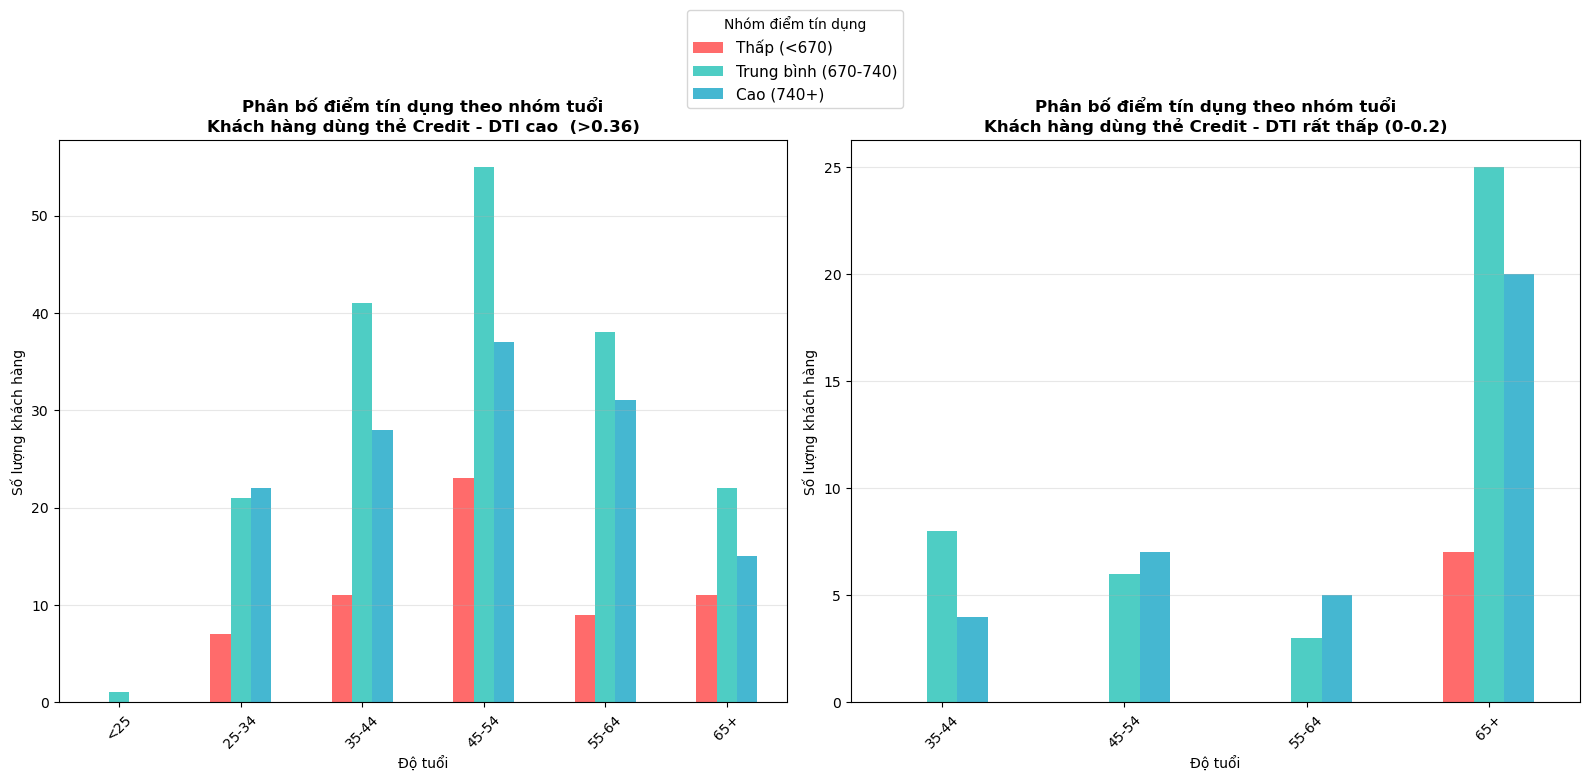


TỶ LỆ ĐIỂM TÍN DỤNG THEO NHÓM DTI

Nhóm điểm tín dụng   DTI Cao (>0.4)  DTI Rất thấp (0-0.2) Chênh lệch
----------------------------------------------------------------------
Thấp (<670)           16.4%           8.2%               -8.2%
Trung bình (670-740)  47.8%          49.4%              +  1.6%
Cao (740+)            35.8%          42.4%              +  6.6%


In [524]:
plt.figure(figsize=(16, 8))  

# Phân bố điểm tín dụng khách hàng dùng thẻ credit có DTI cao
plt.subplot(1, 2, 1)
high_dti_crosstab = pd.crosstab(high_dti_credit['age_group'], high_dti_credit['credit_score_group'])
high_dti_crosstab = high_dti_crosstab.reindex(columns=credit_labels)

bar1 = high_dti_crosstab.plot(kind='bar', color=credit_colors, ax=plt.gca(), legend=False)
plt.title('Phân bố điểm tín dụng theo nhóm tuổi\nKhách hàng dùng thẻ Credit - DTI cao  (>0.36)', fontsize=12, fontweight='bold')
plt.xlabel('Độ tuổi')
plt.ylabel('Số lượng khách hàng')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Phân bố điểm tín dụng khách hàng dùng thẻ credit có DTI rất thấp
plt.subplot(1, 2, 2)
very_low_dti_crosstab = pd.crosstab(very_low_dti_credit['age_group'], very_low_dti_credit['credit_score_group'])
very_low_dti_crosstab = very_low_dti_crosstab.reindex(columns=credit_labels)

bar2 = very_low_dti_crosstab.plot(kind='bar', color=credit_colors, ax=plt.gca(), legend=False)
plt.title('Phân bố điểm tín dụng theo nhóm tuổi\nKhách hàng dùng thẻ Credit - DTI rất thấp (0-0.2)', fontsize=12, fontweight='bold')
plt.xlabel('Độ tuổi')
plt.ylabel('Số lượng khách hàng')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)


plt.figlegend(handles=[plt.Rectangle((0,0),1,1, fc=color) for color in credit_colors],
            labels=credit_labels,
            title='Nhóm điểm tín dụng',
            loc='upper center', 
            bbox_to_anchor=(0.5, 0.98),  
            fontsize=11,
            frameon=True,
            fancybox=True)

plt.tight_layout(rect=[0, 0, 1, 0.88])  
plt.show()


# ==================== THỐNG KÊ TỶ LỆ ĐIỂM TÍN DỤNG THEO NHÓM DTI ====================
print("\n" + "="*70)
print("TỶ LỆ ĐIỂM TÍN DỤNG THEO NHÓM DTI")
print("="*70)

# Tính tỷ lệ phần trăm cho từng nhóm DTI
high_dti_percent = (high_dti_crosstab.sum() / len(high_dti_credit) * 100).round(1)
very_low_dti_percent = (very_low_dti_crosstab.sum() / len(very_low_dti_credit) * 100).round(1)

print(f"\n{'Nhóm điểm tín dụng':<20} {'DTI Cao (>0.4)':<15} {'DTI Rất thấp (0-0.2)':<20} {'Chênh lệch':<10}")
print("-" * 70)

for label in credit_labels:
    high_pct = high_dti_percent[label]
    low_pct = very_low_dti_percent[label]
    diff = low_pct - high_pct  # Khác biệt DTI rất thấp so với DTI cao
    diff_sign = "+" if diff > 0 else ""
    
    print(f"{label:<20} {high_pct:>5.1f}%{'':<8} {low_pct:>5.1f}%{'':<13} {diff_sign}{diff:>5.1f}%")

In [526]:
print(high_dti_credit)

       client_id  gender age_group  yearly_income  credit_score  credit_limit   group_income  total_debt    group_debt card_type  total_spent  total_transactions  year                top_category    group_spent    credit_score_group  dti_ratio    dti_group
0              0    Male     25-34          59613           763  25083.157401    50000–75000       36199   30000–60000    Credit      5703.00                1113  2010               Food & Dining   5,000-10,000            Cao (740+)   0.607233  Cao (>0.36)
40             4  Female     45-54          76431           716  24195.655730   75000–100000      115362       100000+    Credit      8087.00                1498  2010               Food & Dining   5,000-10,000  Trung bình (670-740)   1.509361  Cao (>0.36)
70            13  Female     45-54          32378           588   6807.373821    25000–50000       65919  60000–100000    Credit      4893.00                 703  2010   Construction & Industrial    3,000-5,000           Thấp (<6

/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_55542/1225091649.py:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(


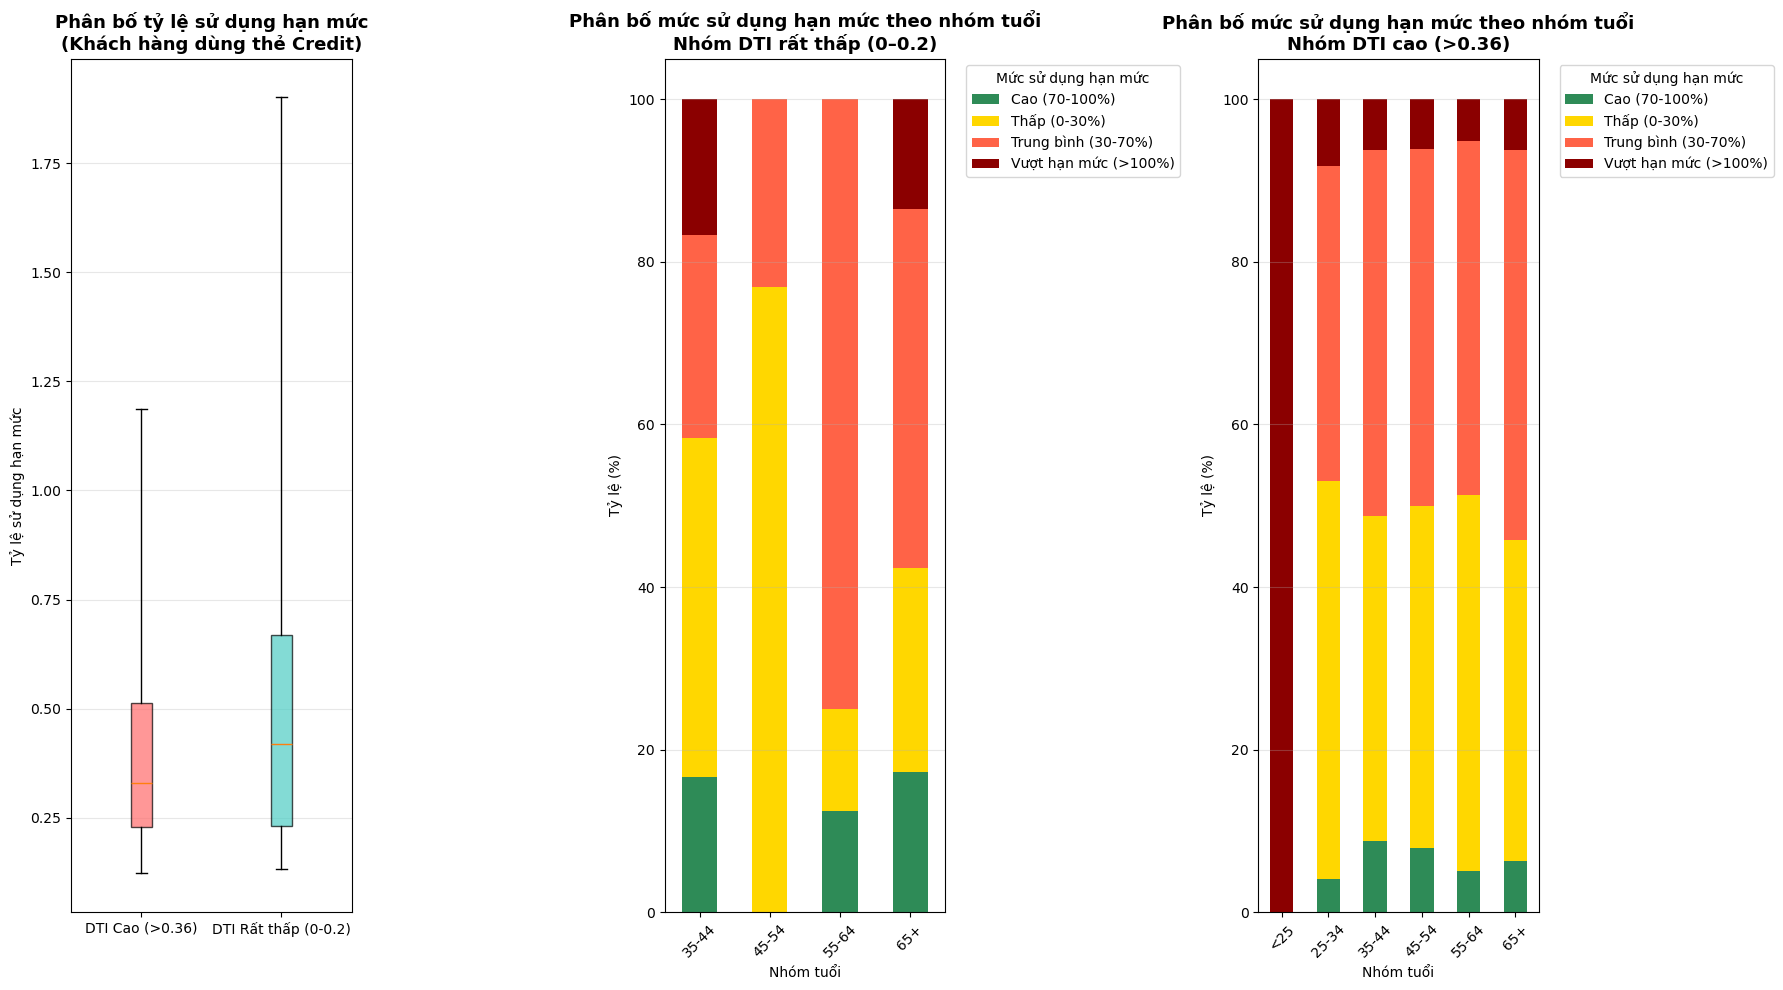


=== TỶ LỆ VƯỢT HẠN MỨC (>100%) ===
DTI Cao: 24/370 (6.5%)
DTI Rất thấp: 9/85 (10.6%)


In [527]:
plt.figure(figsize=(18, 10))

# Loại bỏ khách hàng không có credit limit
high_dti_credit = high_dti_credit[high_dti_credit['credit_limit'] > 0].copy()
very_low_dti_credit = very_low_dti_credit[very_low_dti_credit['credit_limit'] > 0].copy()
credit_card_users = credit_card_users[credit_card_users['credit_limit'] > 0].copy()

# Tính toán tỷ lệ sử dụng hạn mức
high_dti_credit['credit_utilization_ratio'] = high_dti_credit['total_spent'] / high_dti_credit['credit_limit']
very_low_dti_credit['credit_utilization_ratio'] = very_low_dti_credit['total_spent'] / very_low_dti_credit['credit_limit']
credit_card_users['credit_utilization_ratio'] = credit_card_users['total_spent'] / credit_card_users['credit_limit']

utilization_data = [
    high_dti_credit['credit_utilization_ratio'].values,  
    very_low_dti_credit['credit_utilization_ratio'].values  
]
labels = ['DTI Cao (>0.36)', 'DTI Rất thấp (0-0.2)']

# Phân nhóm sử dụng hạn mức
def categorize_utilization(ratio):
    if ratio <= 0.3:
        return 'Thấp (0-30%)'
    elif ratio <= 0.7:
        return 'Trung bình (30-70%)'
    elif ratio <= 1:
        return 'Cao (70-100%)'
    else:
        return 'Vượt hạn mức (>100%)'

credit_card_users['utilization_group'] = credit_card_users['credit_utilization_ratio'].apply(categorize_utilization)
high_dti_credit['utilization_group'] = high_dti_credit['credit_utilization_ratio'].apply(categorize_utilization)
very_low_dti_credit['utilization_group'] = very_low_dti_credit['credit_utilization_ratio'].apply(categorize_utilization)

age_util_low_dti = pd.crosstab(
    very_low_dti_credit['age_group'],
    very_low_dti_credit['utilization_group'],
    normalize='index'
) * 100

age_util_high_dti = pd.crosstab(
    high_dti_credit['age_group'],
    high_dti_credit['utilization_group'],
    normalize='index'
) * 100

# Vẽ boxplot 
plt.subplot(1, 3, 1)
box_plot = plt.boxplot(
    utilization_data,
    labels=labels,
    showfliers=False,     
    patch_artist=True,
    whis=[5, 96]      
)

colors = ['#FF6B6B', '#4ECDC4']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.title("Phân bố tỷ lệ sử dụng hạn mức\n(Khách hàng dùng thẻ Credit)", 
          fontsize=13, fontweight='bold')
plt.ylabel("Tỷ lệ sử dụng hạn mức")
plt.grid(axis='y', alpha=0.3)

colors = ['#2E8B57', '#FFD700', '#FF6347', '#8B0000']

# Phân bố hạn mức nhóm DTI rất thấp
plt.subplot(1, 3, 2)
age_util_low_dti.plot(kind='bar', stacked=True, color=colors, ax=plt.gca())
plt.title("Phân bố mức sử dụng hạn mức theo nhóm tuổi\nNhóm DTI rất thấp (0–0.2)", fontsize=13, fontweight='bold')
plt.xlabel("Nhóm tuổi")
plt.ylabel("Tỷ lệ (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.legend(title="Mức sử dụng hạn mức", bbox_to_anchor=(1.05, 1), loc='upper left')

# Phân bố hạn mức nhóm DTI cao
plt.subplot(1, 3, 3)
age_util_high_dti.plot(kind='bar', stacked=True, color=colors, ax=plt.gca())
plt.title("Phân bố mức sử dụng hạn mức theo nhóm tuổi\nNhóm DTI cao (>0.36)", fontsize=13, fontweight='bold')
plt.xlabel("Nhóm tuổi")
plt.ylabel("Tỷ lệ (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.legend(title="Mức sử dụng hạn mức", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Tính tỷ lệ khách hàng vượt hạn mức
high_dti_over_limit = (high_dti_credit['credit_utilization_ratio'] > 1).sum()
very_low_dti_over_limit = (very_low_dti_credit['credit_utilization_ratio'] > 1).sum()

print(f"\n=== TỶ LỆ VƯỢT HẠN MỨC (>100%) ===")
print(f"DTI Cao: {high_dti_over_limit}/{len(high_dti_credit)} ({high_dti_over_limit/len(high_dti_credit)*100:.1f}%)")
print(f"DTI Rất thấp: {very_low_dti_over_limit}/{len(very_low_dti_credit)} ({very_low_dti_over_limit/len(very_low_dti_credit)*100:.1f}%)")


In [528]:
print("=== THỐNG KÊ CHI TIẾT TỶ LỆ SỬ DỤNG HẠN MỨC ===")
print("+------------------+-------------+------------+----------+----------+------------+----------+----------+")
print("|     Nhóm DTI     |    Số KH    |    Mean    |  Median  |   Min    |   Max      |    Q1    |    Q3    |")
print("+------------------+-------------+------------+----------+----------+------------+----------+----------+")

# Nhóm DTI Cao (>0.4)
print(f"| DTI Cao (>0.4)   | {len(high_dti_credit):>11} | {high_dti_credit['credit_utilization_ratio'].mean():>7.3f}    | {high_dti_credit['credit_utilization_ratio'].median():>7.3f}  | {high_dti_credit['credit_utilization_ratio'].min():>7.3f}  | {high_dti_credit['credit_utilization_ratio'].max():>7.3f}    | {high_dti_credit['credit_utilization_ratio'].quantile(0.25):>7.3f}  | {high_dti_credit['credit_utilization_ratio'].quantile(0.75):>7.3f}  |")

# Nhóm DTI Rất thấp (0-0.2)
print(f"| DTI Rất thấp     | {len(very_low_dti_credit):>11} | {very_low_dti_credit['credit_utilization_ratio'].mean():>7.3f}    | {very_low_dti_credit['credit_utilization_ratio'].median():>7.3f}  | {very_low_dti_credit['credit_utilization_ratio'].min():>7.3f}  | {very_low_dti_credit['credit_utilization_ratio'].max():>7.3f}  | {very_low_dti_credit['credit_utilization_ratio'].quantile(0.25):>7.3f}  | {very_low_dti_credit['credit_utilization_ratio'].quantile(0.75):>7.3f}  |")

print("+------------------+-------------+------------+----------+----------+------------+----------+----------+")

=== THỐNG KÊ CHI TIẾT TỶ LỆ SỬ DỤNG HẠN MỨC ===
+------------------+-------------+------------+----------+----------+------------+----------+----------+
|     Nhóm DTI     |    Số KH    |    Mean    |  Median  |   Min    |   Max      |    Q1    |    Q3    |
+------------------+-------------+------------+----------+----------+------------+----------+----------+
| DTI Cao (>0.4)   |         370 |   0.470    |   0.329  |   0.007  |   7.163    |   0.229  |   0.513  |
| DTI Rất thấp     |          85 | 201.010    |   0.418  |   0.024  | 17034.427  |   0.232  |   0.669  |
+------------------+-------------+------------+----------+----------+------------+----------+----------+


In [529]:
# === THỐNG KÊ PHÂN BỐ ĐIỂM TÍN DỤNG ===
# Tạo bảng thống kê
credit_score_debit = debit_card_users['credit_score_group'].value_counts().sort_index()
credit_score_debit_pct = debit_card_users['credit_score_group'].value_counts(normalize=True).sort_index() * 100

credit_score_credit = credit_card_users['credit_score_group'].value_counts().sort_index()
credit_score_credit_pct = credit_card_users['credit_score_group'].value_counts(normalize=True).sort_index() * 100

# Tạo mapping để sửa lại thứ tự dữ liệu
group_mapping = {
    'Thấp (<670)': 'Cao (740+)',
    'Trung bình (670-740)': 'Trung bình (670-740)', 
    'Cao (740+)': 'Thấp (<670)'
}

print("=== THỐNG KÊ PHÂN BỐ ĐIỂM TÍN DỤNG ===")
print("+----------------------+------------------+----------------------+------------------+------------------+")
print("| Nhóm điểm tín dụng   | Debit Card (SL)  |    Debit Card (%)    | Credit Card (SL) | Credit Card (%)  |")
print("+----------------------+------------------+----------------------+------------------+------------------+")

for display_group in ['Thấp (<670)', 'Trung bình (670-740)', 'Cao (740+)']:
    # Lấy nhóm thực tế từ dữ liệu
    actual_group = group_mapping[display_group]
    
    debit_count = credit_score_debit.get(actual_group, 0)
    debit_pct = credit_score_debit_pct.get(actual_group, 0)
    credit_count = credit_score_credit.get(actual_group, 0)
    credit_pct = credit_score_credit_pct.get(actual_group, 0)
    
    print(f"| {display_group:<20} | {debit_count:>16} | {debit_pct:>18.1f}%  | {credit_count:>16} | {credit_pct:>14.1f}%  |")

print("+----------------------+------------------+----------------------+------------------+------------------+")
print(f"| Tổng cộng            | {credit_score_debit.sum():>16} |{'100.0':>20}% | {credit_score_credit.sum():>16} | {'100.0':>14}%  |")
print("+----------------------+------------------+----------------------+------------------+------------------+")

=== THỐNG KÊ PHÂN BỐ ĐIỂM TÍN DỤNG ===
+----------------------+------------------+----------------------+------------------+------------------+
| Nhóm điểm tín dụng   | Debit Card (SL)  |    Debit Card (%)    | Credit Card (SL) | Credit Card (%)  |
+----------------------+------------------+----------------------+------------------+------------------+
| Thấp (<670)          |              210 |               30.7%  |              173 |           37.0%  |
| Trung bình (670-740) |              337 |               49.2%  |              225 |           48.1%  |
| Cao (740+)           |              138 |               20.1%  |               70 |           15.0%  |
+----------------------+------------------+----------------------+------------------+------------------+
| Tổng cộng            |              685 |               100.0% |              468 |          100.0%  |
+----------------------+------------------+----------------------+------------------+------------------+
